In [125]:
# !pip install mlxtend xgboost

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [127]:
# load datasets
ctr_churn= pd.read_csv('cleaned_churned_dataset.csv')
ctr_churn.sample(5)

,Unnamed: 0,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
1472,1653,1654,23444.70944,32908.37108,9.0,0,19,9907.012846,AE_IN,0,0,0,1,2.284917,0
1202,1347,1348,16442.98831,42133.37114,8.0,0,28,6683.844499,AE_IN,0,0,0,0,1.979783,0
2874,3213,3214,17264.89753,13016.00291,6.0,1,23,3101.414497,AE_IN,0,0,0,1,0.964968,0
2749,3074,3075,19418.72414,28040.27349,7.0,0,25,7469.125334,AE_PK,0,0,0,0,0.853986,0
2898,3241,3242,28696.67411,19585.08624,8.0,0,32,13418.867710,AE_PH,0,0,0,0,1.557302,0


In [128]:
# drop columns not needed
ctr_churn= ctr_churn.drop(['Unnamed: 0', 'cust_id'], axis=1)

In [129]:
cat_columns= ["main_remittance_corridor"]

ctr_churn = pd.get_dummies(ctr_churn, prefix_sep= "_", columns= cat_columns)

In [130]:
ctr_churn

,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned,main_remittance_corridor_AE_IN,main_remittance_corridor_AE_PH,main_remittance_corridor_AE_PK
0,63863.135880,87983.134390,20.0,0,22,23377.338230,0,0,0,0,2.065258,0,1,0,0
1,51537.479640,63655.109150,17.0,0,20,8353.525522,0,0,0,0,2.761676,0,0,0,1
2,3298.248451,4776.336091,2.0,0,26,1213.782465,0,0,0,0,0.297064,1,0,0,1
3,14402.605700,13925.390670,5.0,0,18,6202.880445,0,0,0,0,2.623058,0,1,0,0
4,8635.683507,10143.513660,3.0,0,21,6175.393029,0,0,0,0,0.160443,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,11278.680190,31650.808860,6.0,0,17,6577.329506,0,0,0,0,0.074624,1,1,0,0
6634,28050.556410,15049.033520,8.0,0,29,14028.190990,0,0,0,0,0.156034,0,0,1,0
6635,46424.997550,24527.674280,13.0,0,25,22261.956280,0,0,0,0,0.484825,0,0,0,1
6636,28140.266220,58965.306480,12.0,0,26,6162.548544,0,0,0,1,0.493830,0,1,0,0


In [131]:
ctr_churn.describe()

,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned,main_remittance_corridor_AE_IN,main_remittance_corridor_AE_PH,main_remittance_corridor_AE_PK
count,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000
mean,24077.287863,31987.129237,8.015065,0.201115,34.302049,10769.823404,0.041277,0.021995,0.013106,0.111178,1.496376,0.072462,0.510997,0.143869,0.345134
std,18905.538858,36988.660096,5.020562,0.400864,57.685320,9850.897280,0.198946,0.146677,0.113739,0.314376,0.871284,0.259270,0.499917,0.350983,0.475448
min,1434.354208,653.062575,1.000000,0.000000,7.000000,455.821035,0.000000,0.000000,0.000000,0.000000,0.000322,0.000000,0.000000,0.000000,0.000000
25%,11657.025275,11083.185205,4.000000,0.000000,20.000000,4580.143122,0.000000,0.000000,0.000000,0.000000,0.738610,0.000000,0.000000,0.000000,0.000000
50%,19010.887035,20660.959015,7.000000,0.000000,23.000000,8068.427593,0.000000,0.000000,0.000000,0.000000,1.495018,0.000000,1.000000,0.000000,0.000000
75%,30246.748850,39374.946608,10.000000,0.000000,27.000000,13718.816140,0.000000,0.000000,0.000000,0.000000,2.252410,0.000000,1.000000,0.000000,1.000000
max,244970.926100,715752.663000,20.000000,1.000000,350.000000,137563.019000,1.000000,1.000000,1.000000,1.000000,2.999704,1.000000,1.000000,1.000000,1.000000


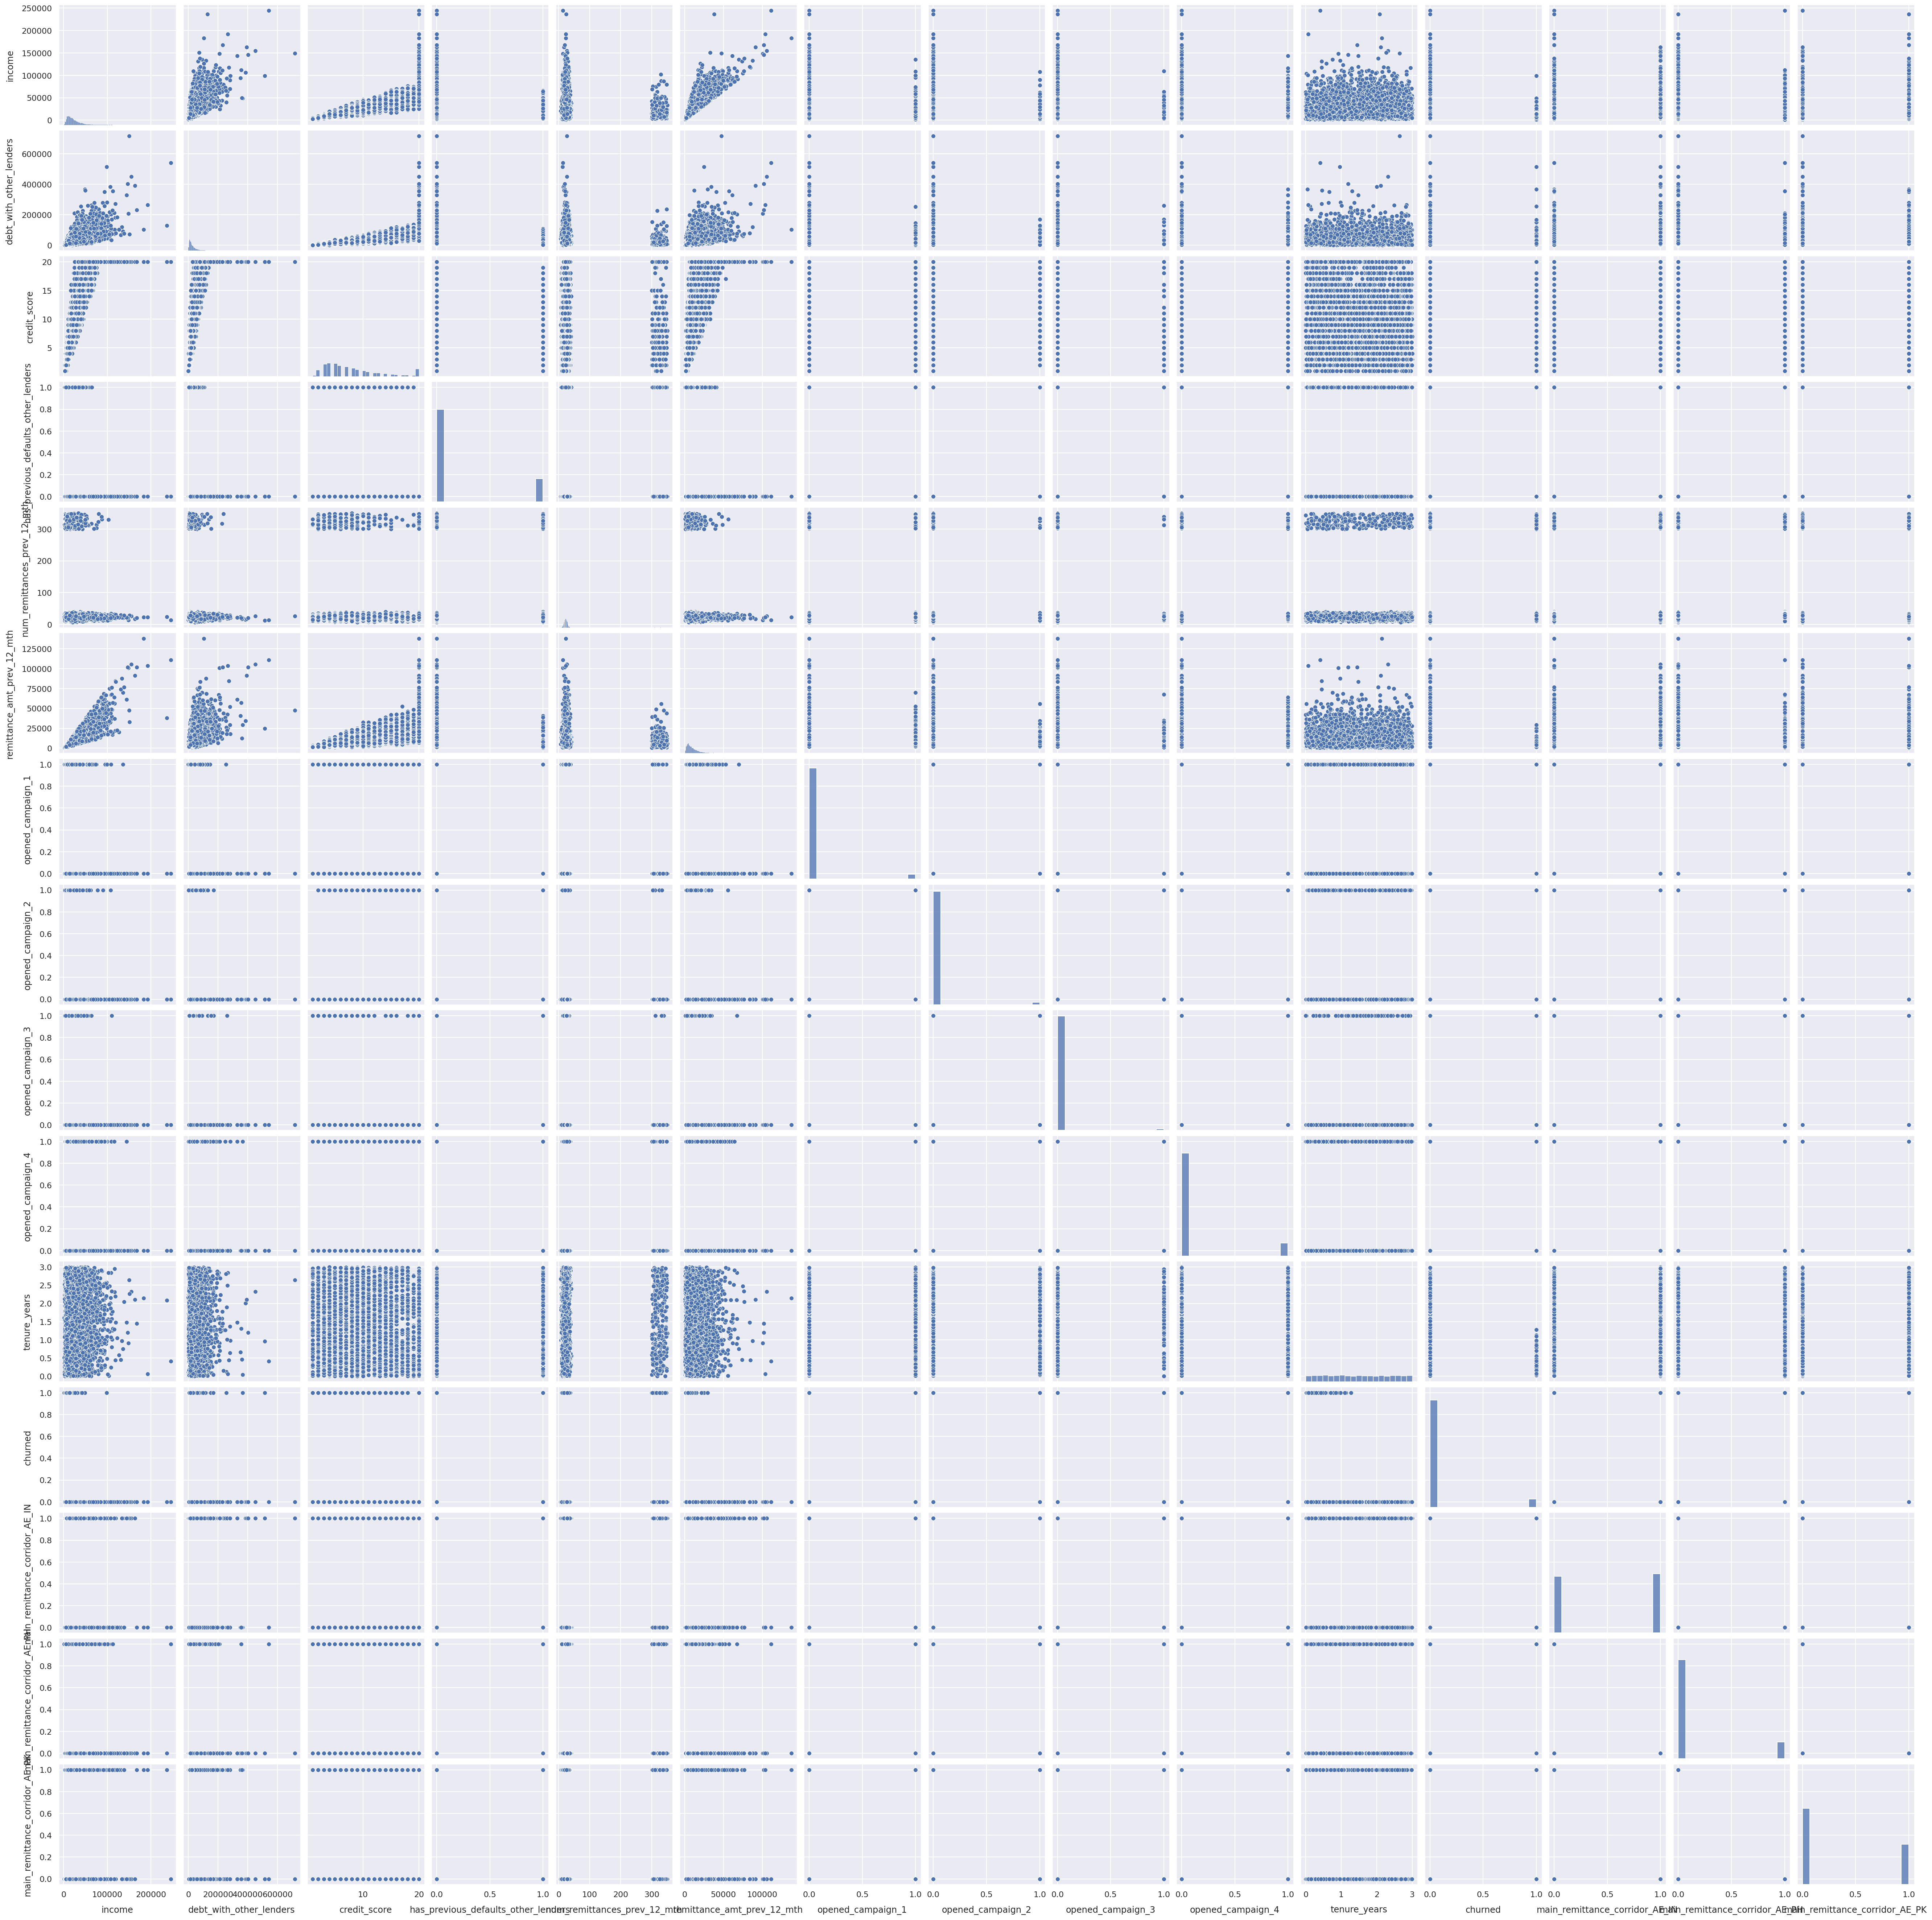

In [132]:
sns.pairplot(ctr_churn)

/home/josephitopa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


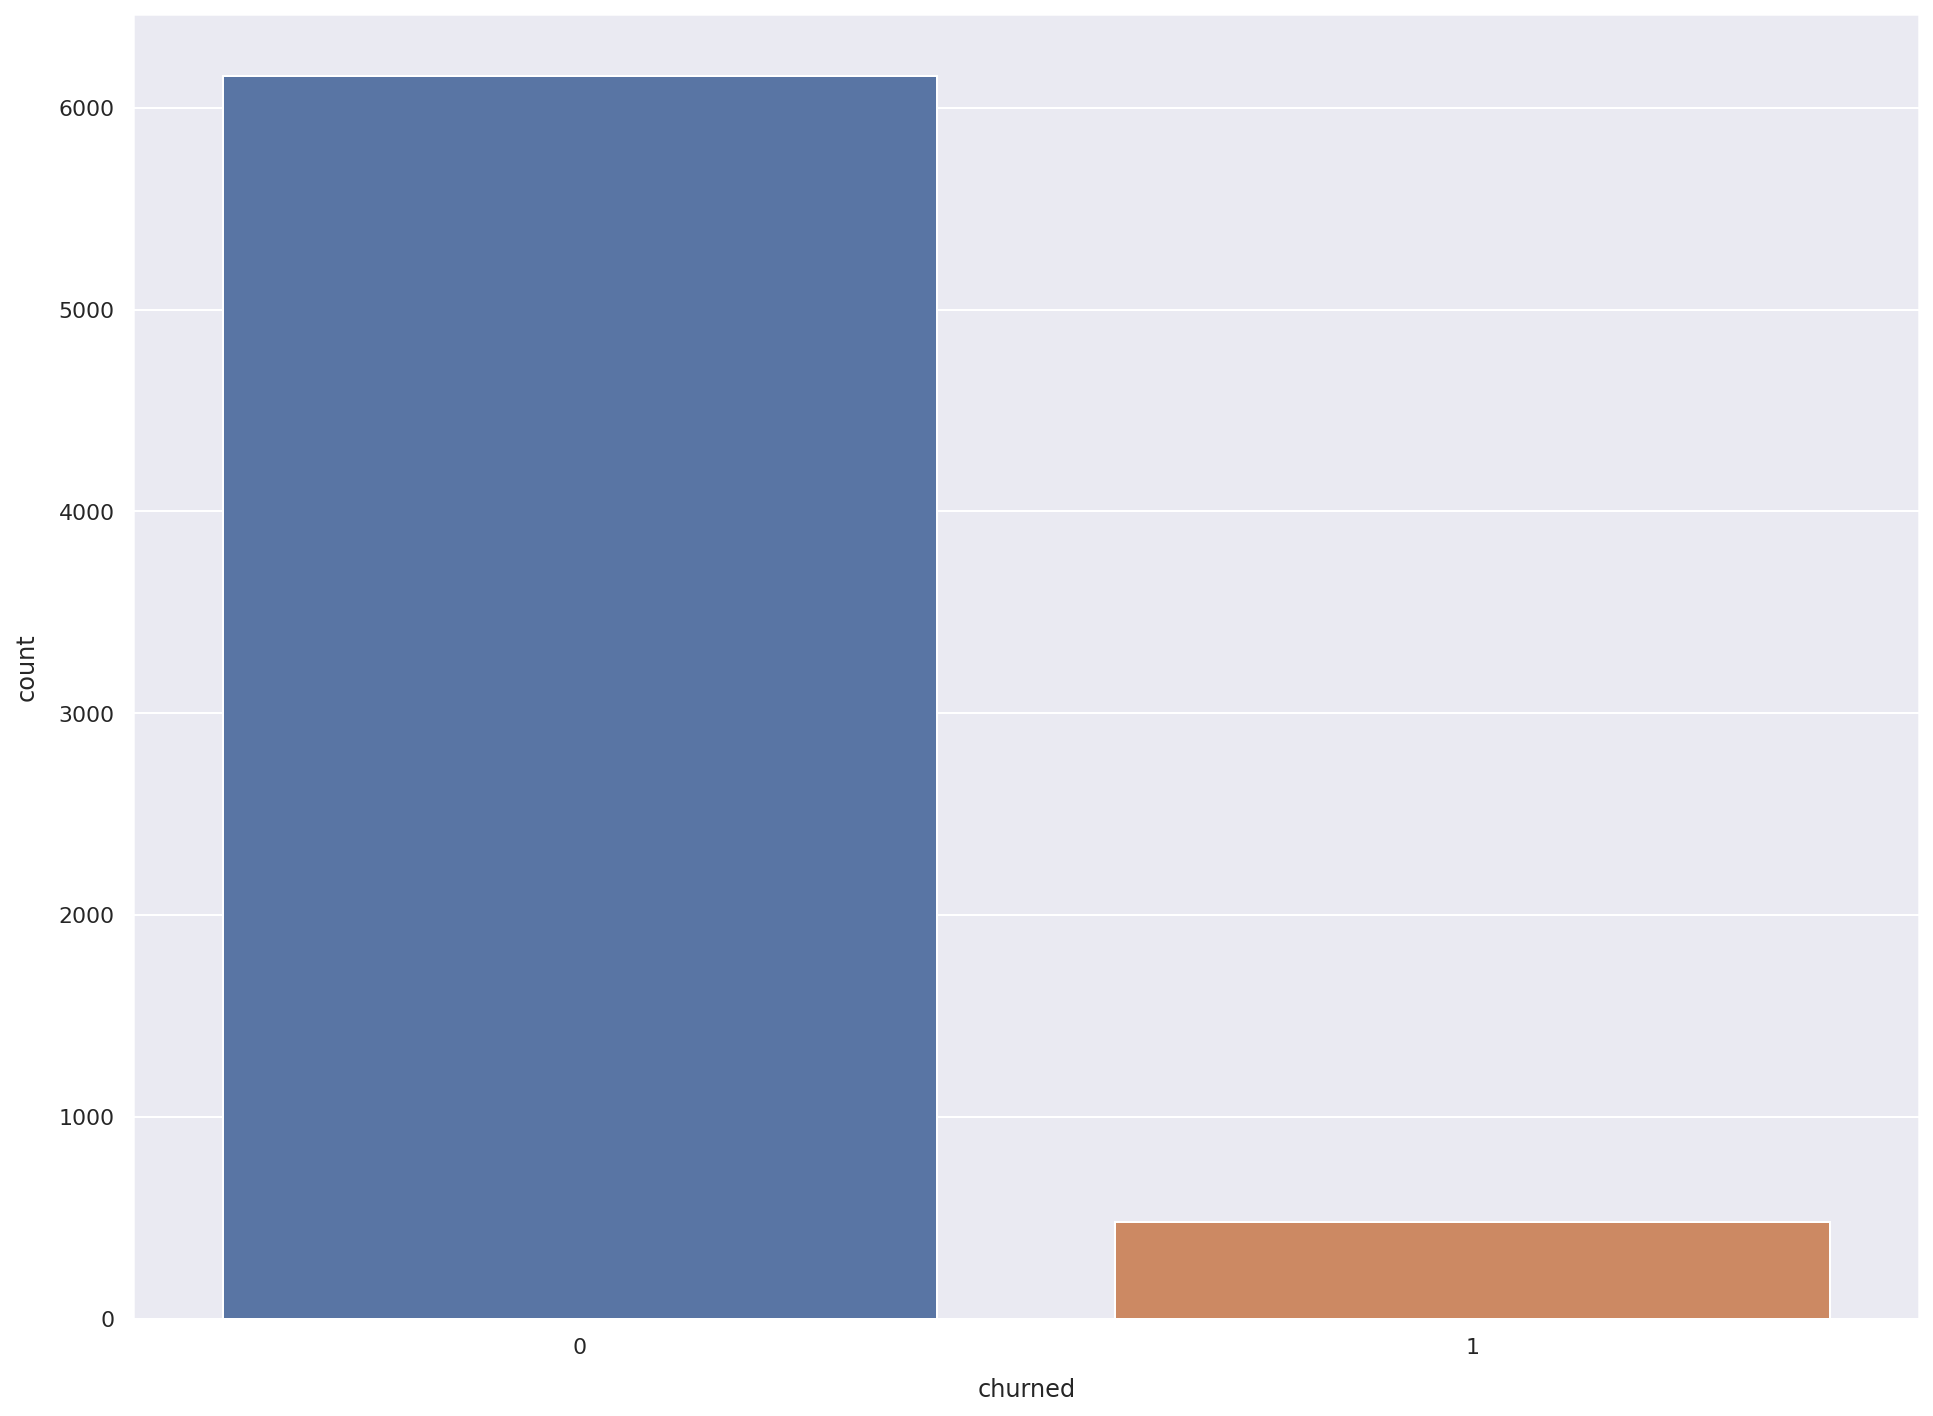

In [133]:
ax = sns.countplot(ctr_churn['churned'],label="Count")

<AxesSubplot:>

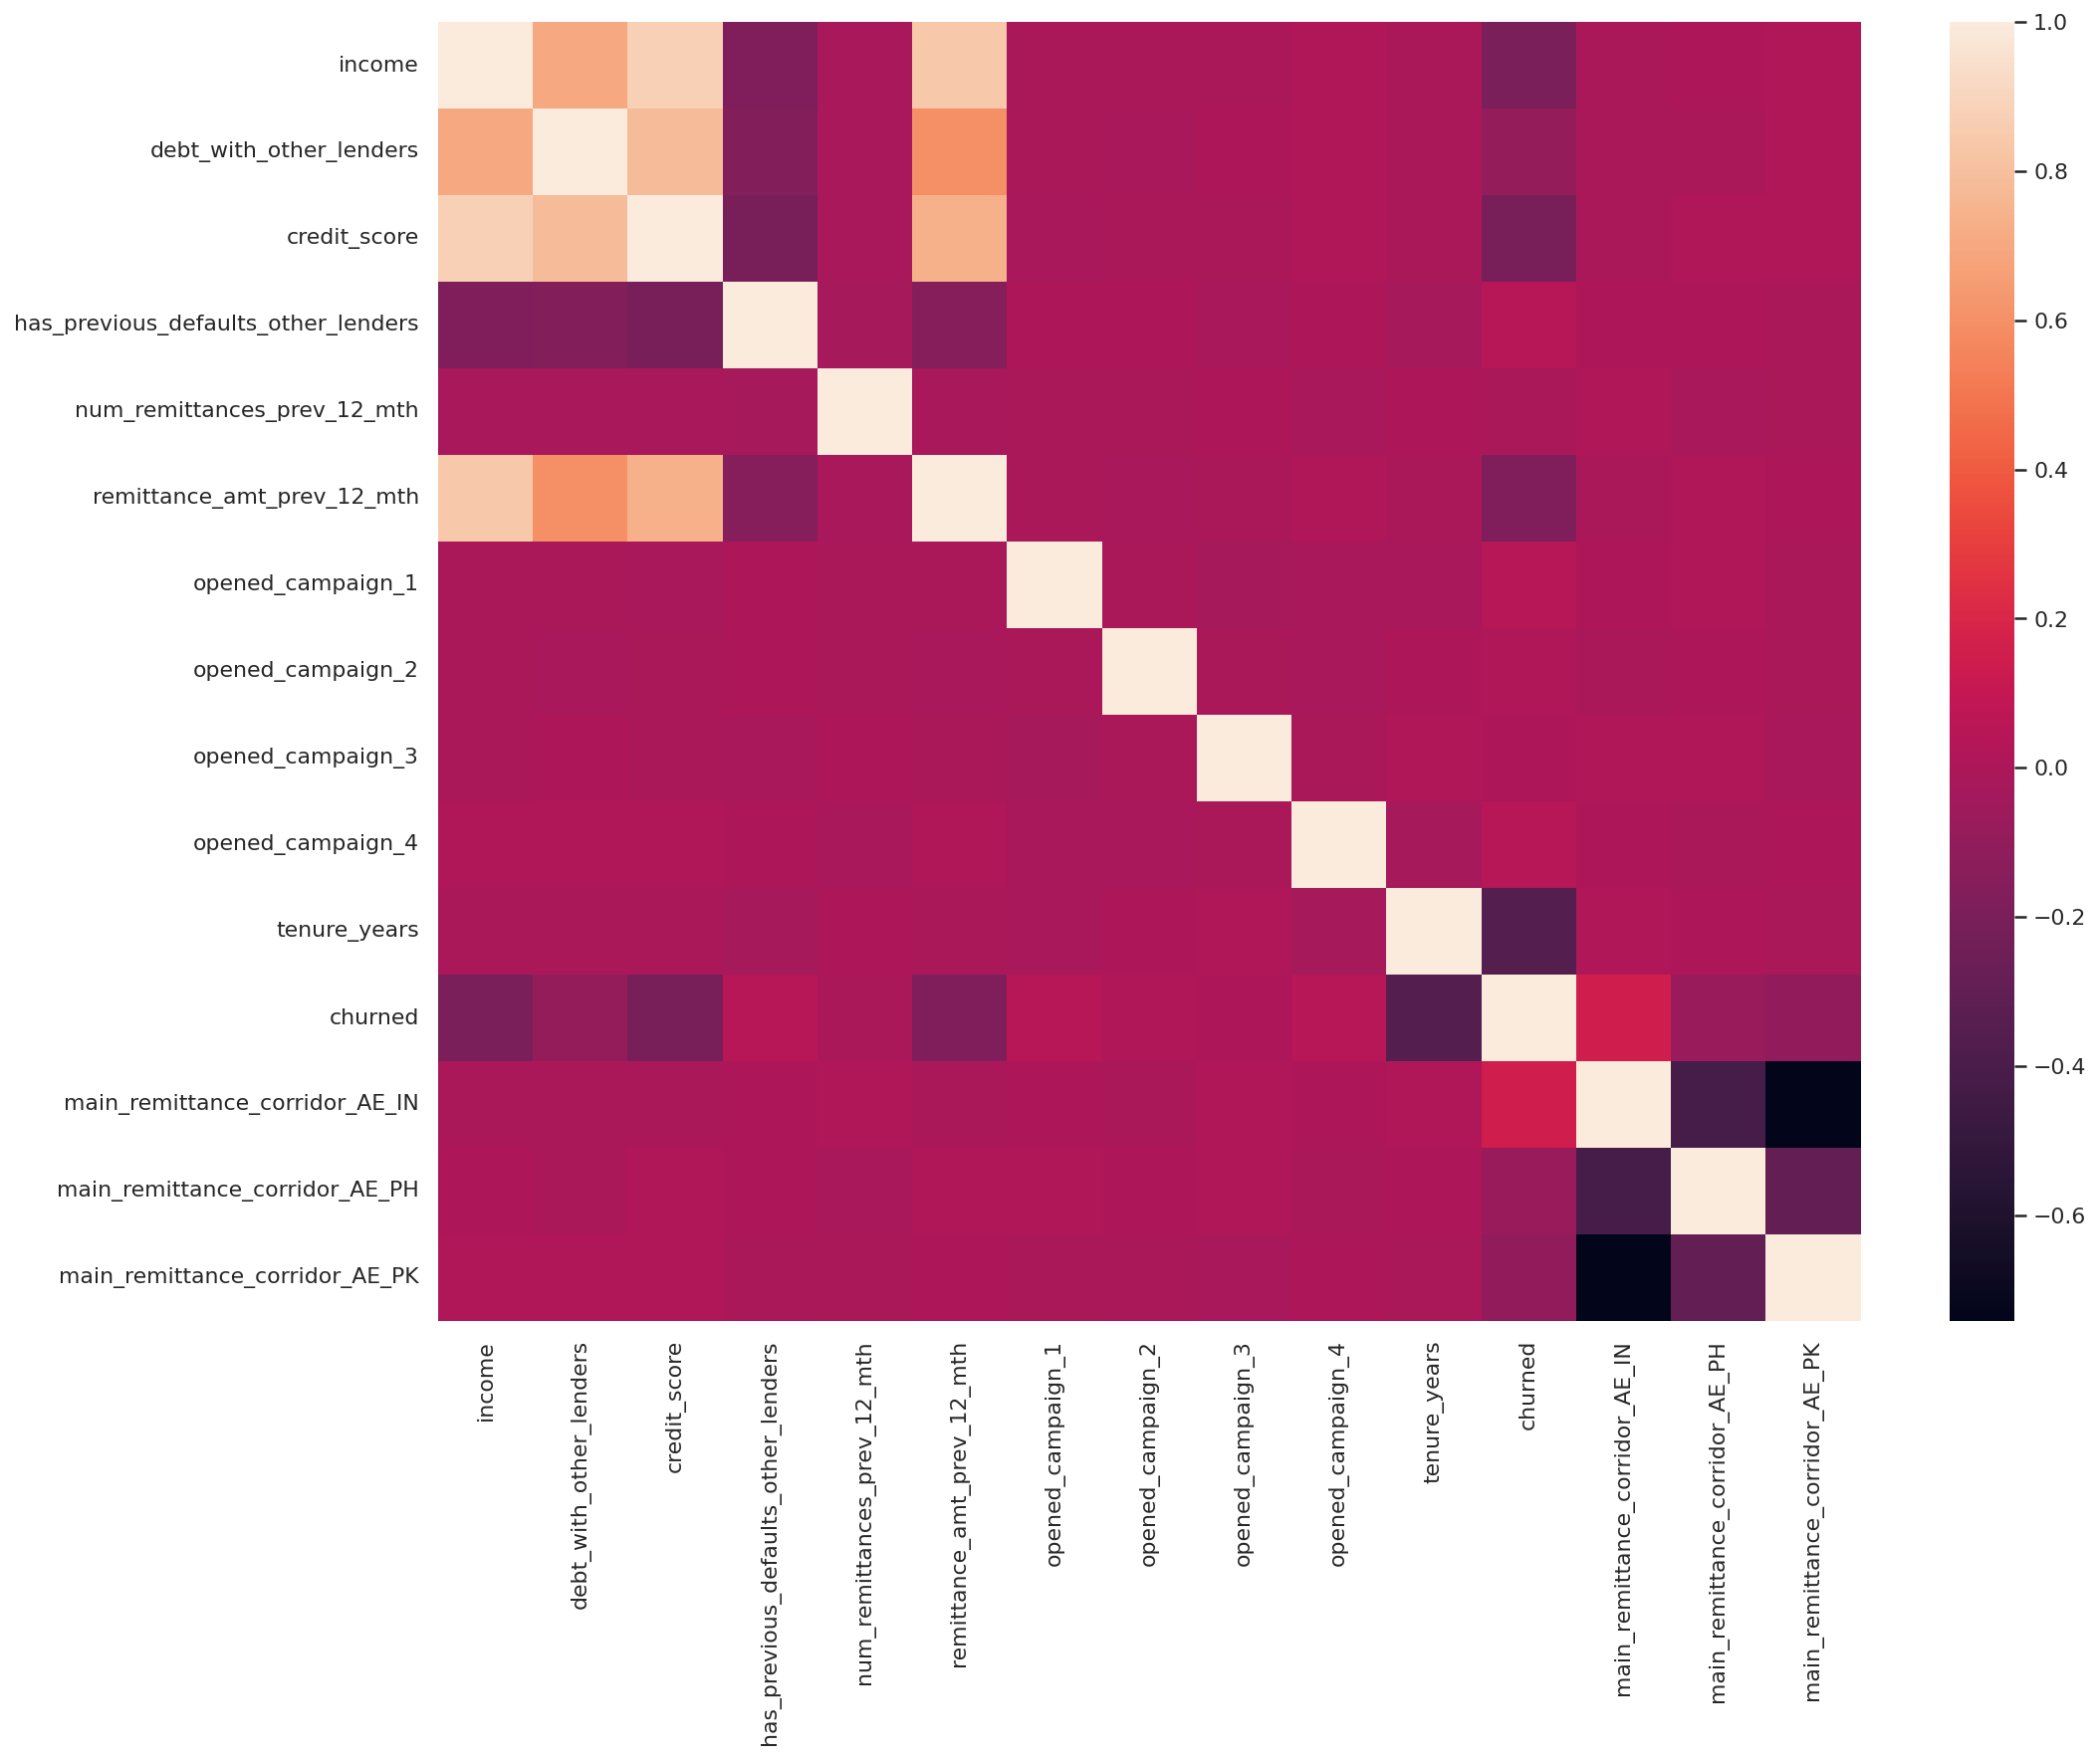

In [134]:
sns.heatmap(ctr_churn.corr())

### Feature Importance

In [135]:
# Create features and target
X= ctr_churn.drop(['churned'], axis=1)
y= ctr_churn['churned']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [137]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [138]:
print('Chosen best feature by rfe:', X_train.columns[rfe.support_])

Chosen best feature by rfe: Index(['income', 'debt_with_other_lenders', 'credit_score',
       'num_remittances_prev_12_mth', 'remittance_amt_prev_12_mth',
       'opened_campaign_4', 'tenure_years', 'main_remittance_corridor_AE_IN',
       'main_remittance_corridor_AE_PH', 'main_remittance_corridor_AE_PK'],
      dtype='object')


In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)

In [140]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [2.68712315e+06 1.71011133e+06 5.91468812e+02 1.00434815e+01
 1.57450913e+00 1.33397053e+06 1.09624552e+01 8.11356425e-01
 5.21677374e-01 4.13802152e+00 2.89321871e+02 5.59767588e+01
 1.89627433e+01 3.81496804e+01]
Feature list: Index(['income', 'debt_with_other_lenders', 'credit_score',
       'has_previous_defaults_other_lenders', 'num_remittances_prev_12_mth',
       'remittance_amt_prev_12_mth', 'opened_campaign_1', 'opened_campaign_2',
       'opened_campaign_3', 'opened_campaign_4', 'tenure_years',
       'main_remittance_corridor_AE_IN', 'main_remittance_corridor_AE_PH',
       'main_remittance_corridor_AE_PK'],
      dtype='object')


In [141]:
import xgboost as xgb 
clf_gbt = xgb.XGBClassifier()
# Train the model
clf_gbt.fit(X_train,np.ravel(y_train))
# Print the feature importances
clf_gbt.get_booster().get_score(importance_type = 'weight')

[15:58:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/josephitopa/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'tenure_years': 312,
 'income': 297,
 'main_remittance_corridor_AE_IN': 85,
 'opened_campaign_4': 43,
 'opened_campaign_1': 25,
 'debt_with_other_lenders': 239,
 'remittance_amt_prev_12_mth': 188,
 'num_remittances_prev_12_mth': 98,
 'opened_campaign_3': 4,
 'main_remittance_corridor_AE_PK': 16,
 'credit_score': 22,
 'opened_campaign_2': 7,
 'has_previous_defaults_other_lenders': 11}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

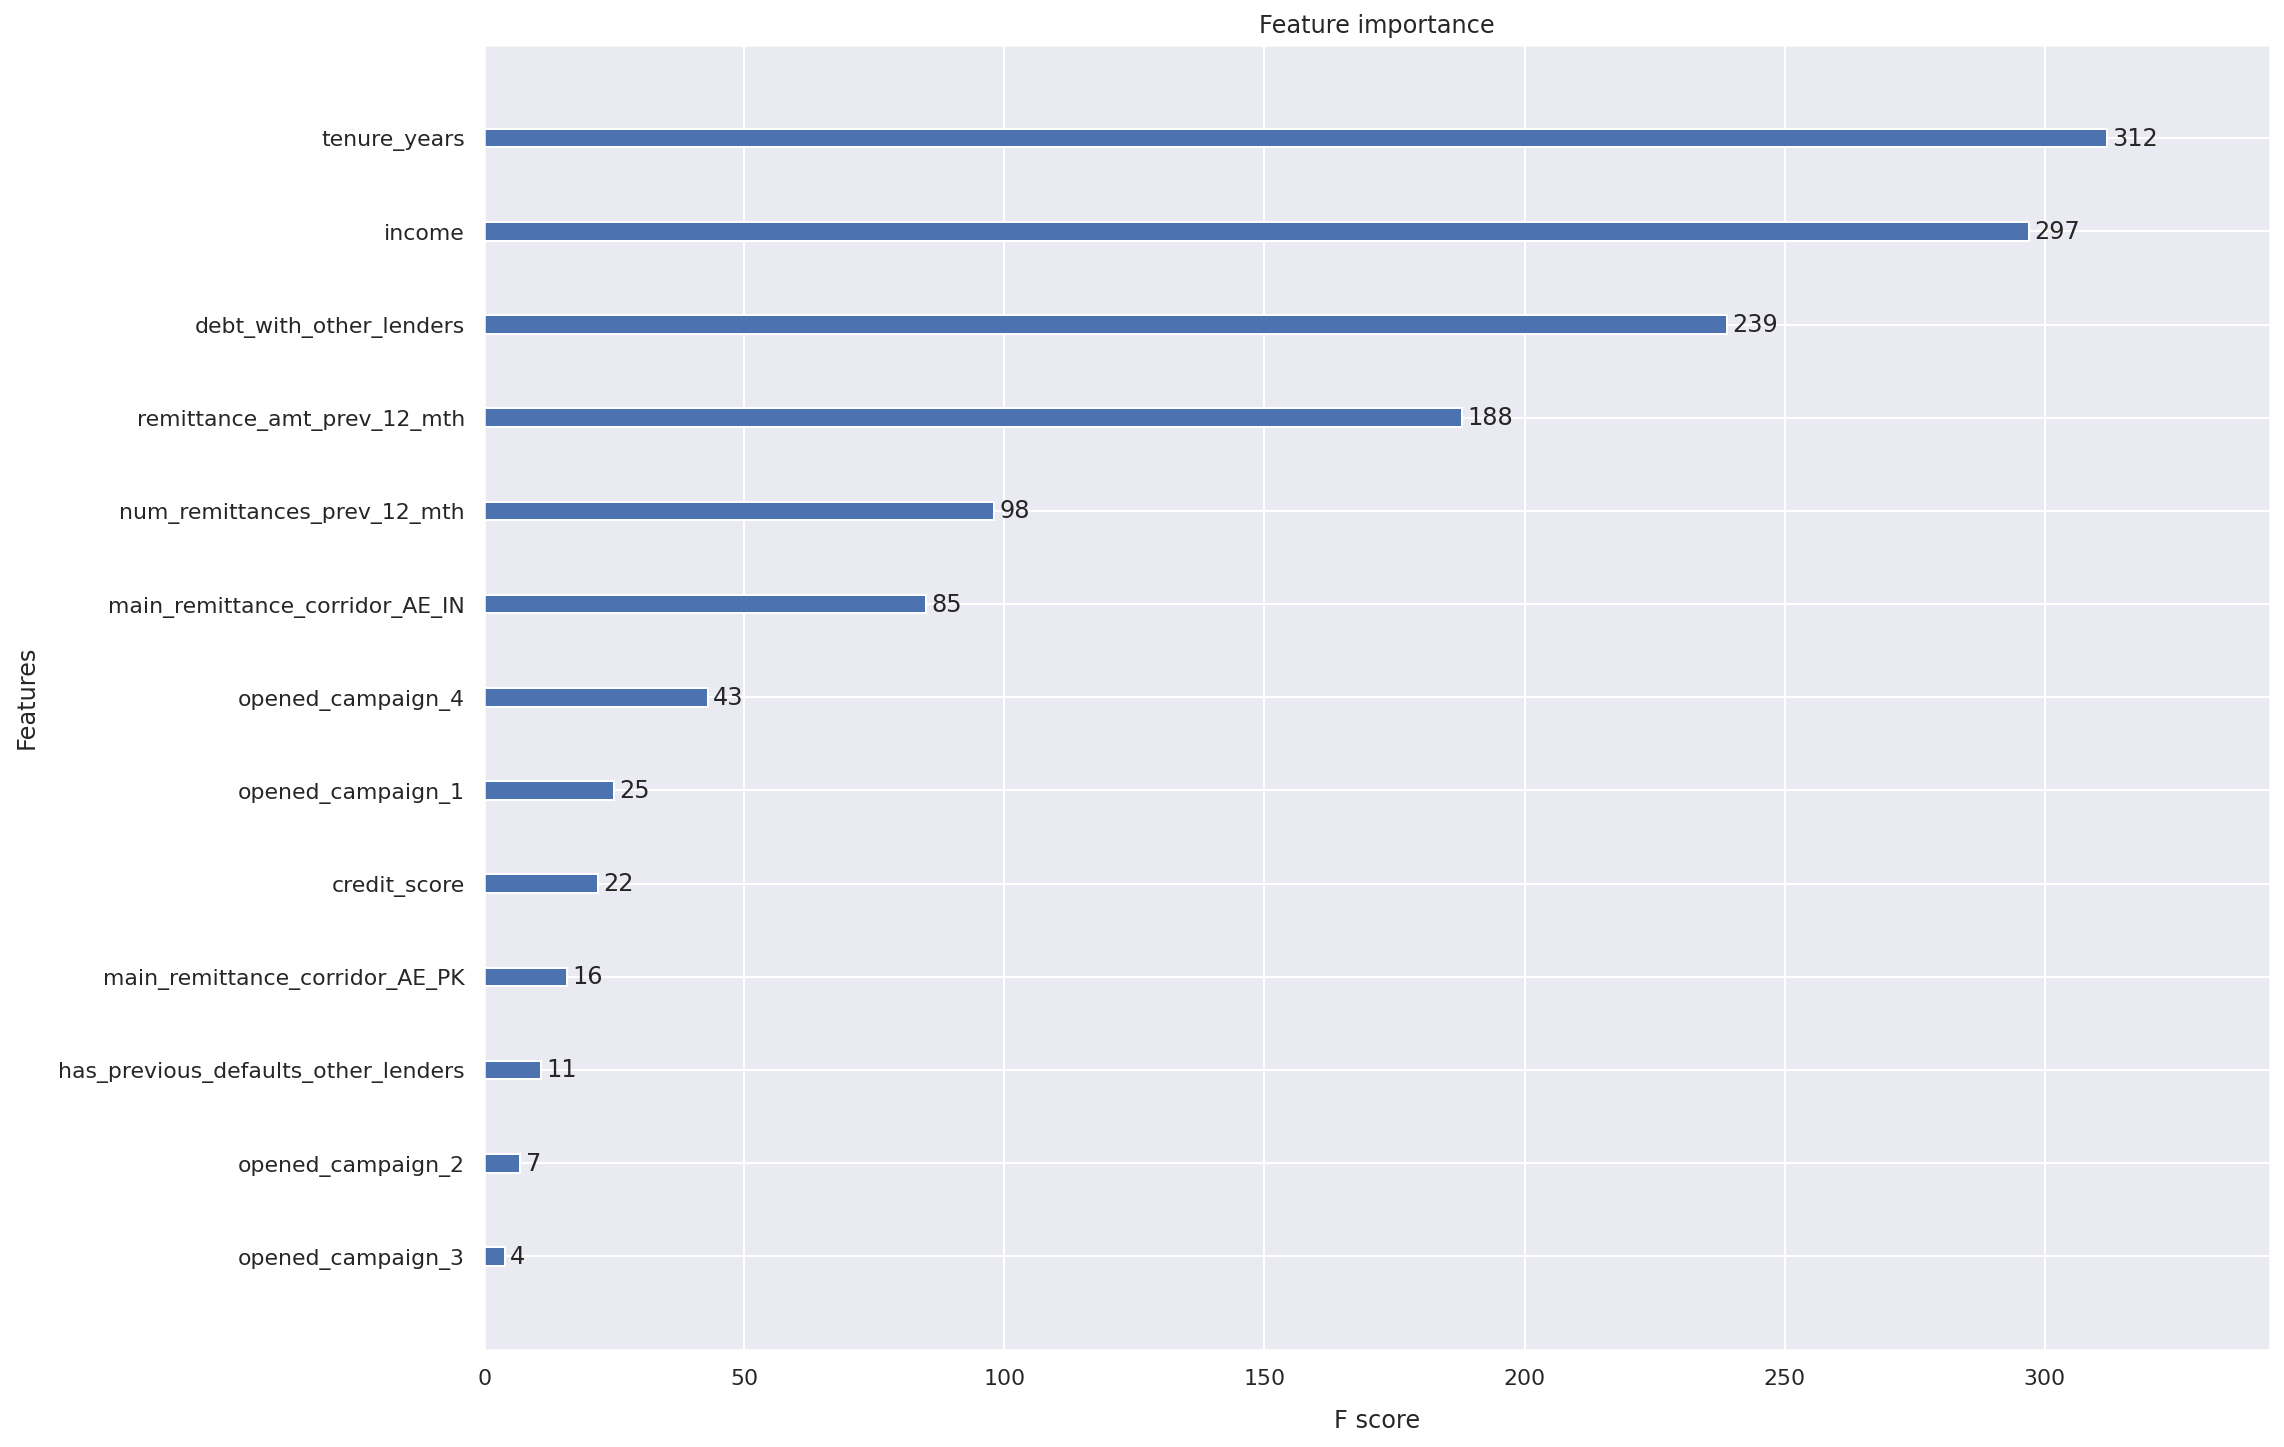

In [142]:
xgb.plot_importance(clf_gbt, importance_type = 'weight')

### Modelling

In [143]:
# Undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [144]:
# Split the data for training, validation, and test into separate dataframes
# produces a 70%, 15%, 15% split for training, validation and test sets
train_data, validation_data, test_data = np.split(ctr_churn.sample(frac=1), [int(.7*len(ctr_churn)), int(.85*len(ctr_churn))])

#convert dfs to .csv and save locally; file is saved to notebook instance
train_data.to_csv('train.csv', header=True, index=False)
validation_data.to_csv('validation.csv', header=True, index=False)
test_data.to_csv('test.csv', header=True, index=False)

In [145]:
# training data

train_df= pd.read_csv('train.csv')
X_train= train_df.drop(['churned'], axis=1)
y_train= train_df['churned']

# test data

test_df= pd.read_csv('test.csv')
X_test= test_df.drop(['churned'], axis=1)
y_test= test_df['churned']

# validation data

val_df= pd.read_csv('validation.csv')
X_val= val_df.drop(['churned'], axis=1)
y_val= val_df['churned']

In [146]:
y_train.value_counts()

0    4321
1     325
Name: churned, dtype: int64

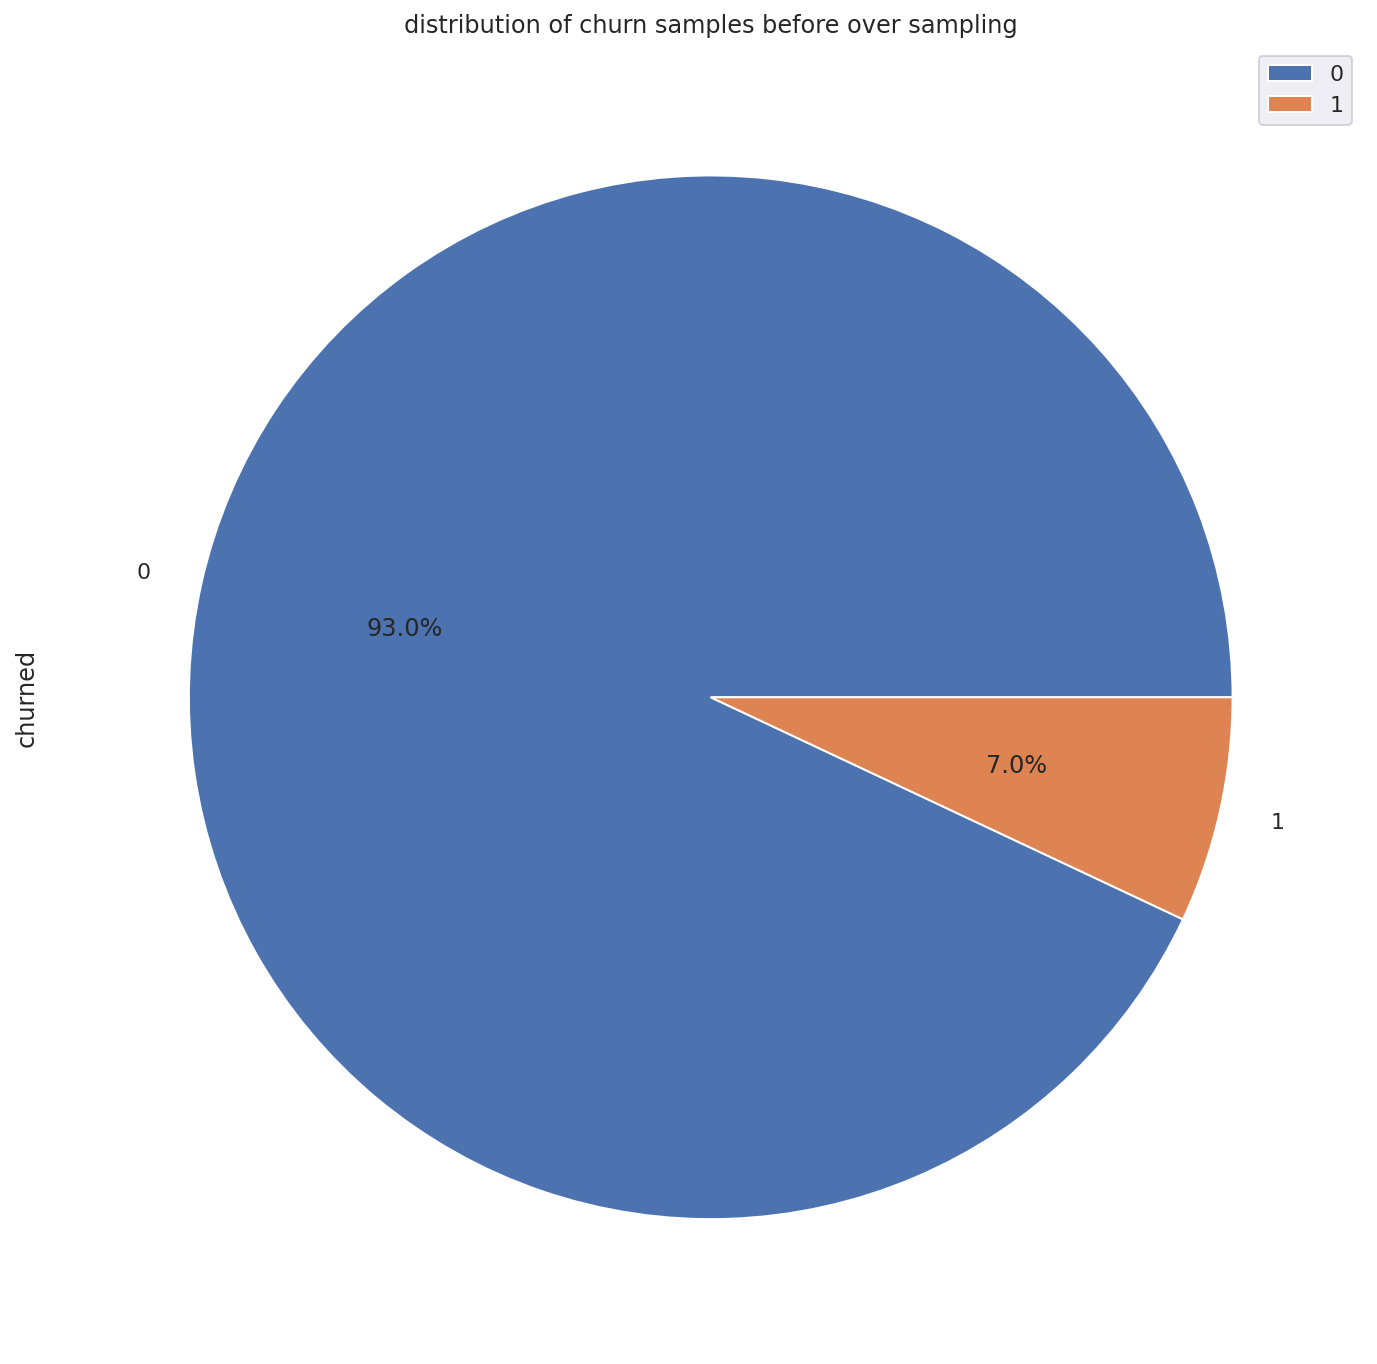

In [147]:
# Visualize this with a pie chart
pie = y_train.value_counts().plot(kind="pie",title='distribution of churn samples before over sampling',legend=True, autopct='%1.1f%%')
plt.show()

In [148]:
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({0: 6157, 1: 481})
Resample dataset shape Counter({0: 4321, 1: 4321})


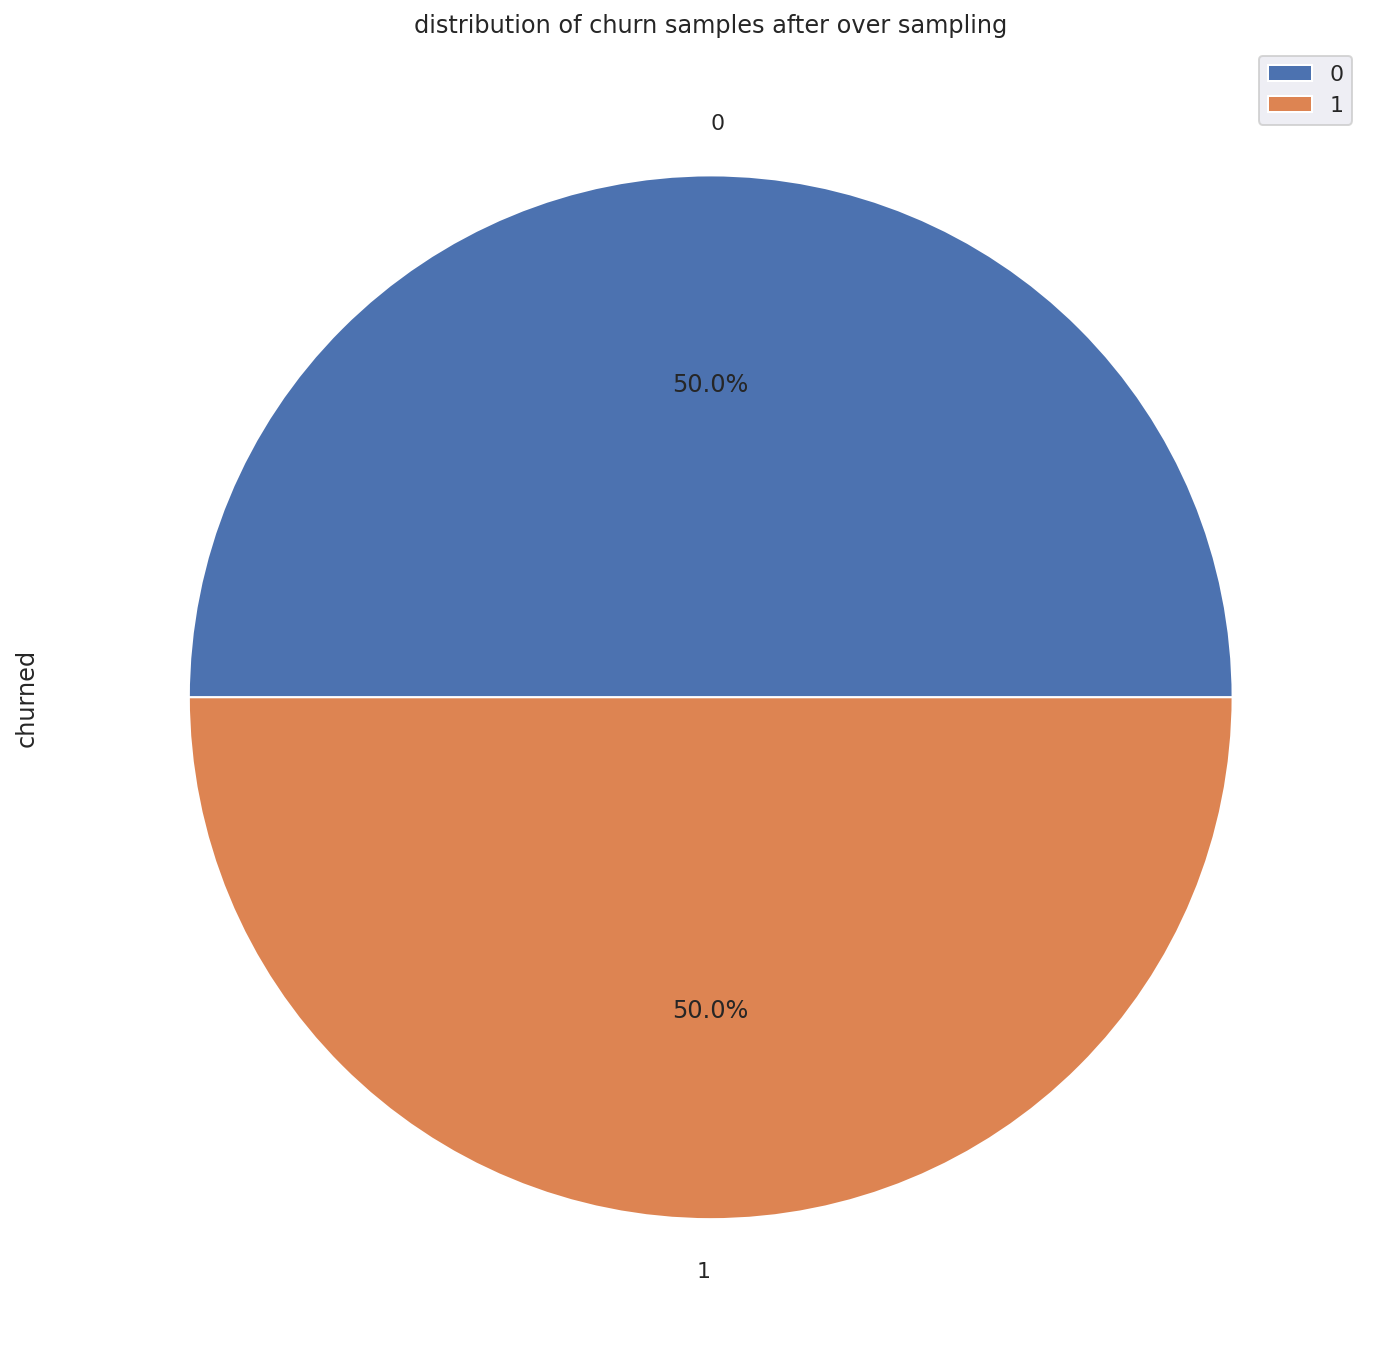

In [149]:
# Visualize this with a pie chart
pie = y_train_smote.value_counts().plot(kind="pie",title='distribution of churn samples after over sampling',legend=True, autopct='%1.1f%%')
plt.show()

### Algorithm training and testing

#### Logistic regression

In [150]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('lr', LogisticRegression())] # ('scaler', StandardScaler()),
# Create the pipeline: pipeline
pipeline_lr= Pipeline(steps)
# Fit the pipeline to the train set
pipeline_lr.fit(X_train_smote, y_train_smote)
# Predict the labels of the test set
y_pred_lr= pipeline_lr.predict(X_test)

In [151]:
# Print the parameters of the model
print(pipeline_lr.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('lr', LogisticRegression())], 'verbose': False, 'scaler': StandardScaler(), 'lr': LogisticRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'lr__C': 1.0, 'lr__class_weight': None, 'lr__dual': False, 'lr__fit_intercept': True, 'lr__intercept_scaling': 1, 'lr__l1_ratio': None, 'lr__max_iter': 100, 'lr__multi_class': 'auto', 'lr__n_jobs': None, 'lr__penalty': 'l2', 'lr__random_state': None, 'lr__solver': 'lbfgs', 'lr__tol': 0.0001, 'lr__verbose': 0, 'lr__warm_start': False}


In [152]:
# Compute metrics
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       914
           1       0.80      0.90      0.85        82

    accuracy                           0.97       996
   macro avg       0.89      0.94      0.92       996
weighted avg       0.98      0.97      0.97       996



Text(0.5, 1.0, 'Confusion matrix for logistic regression')

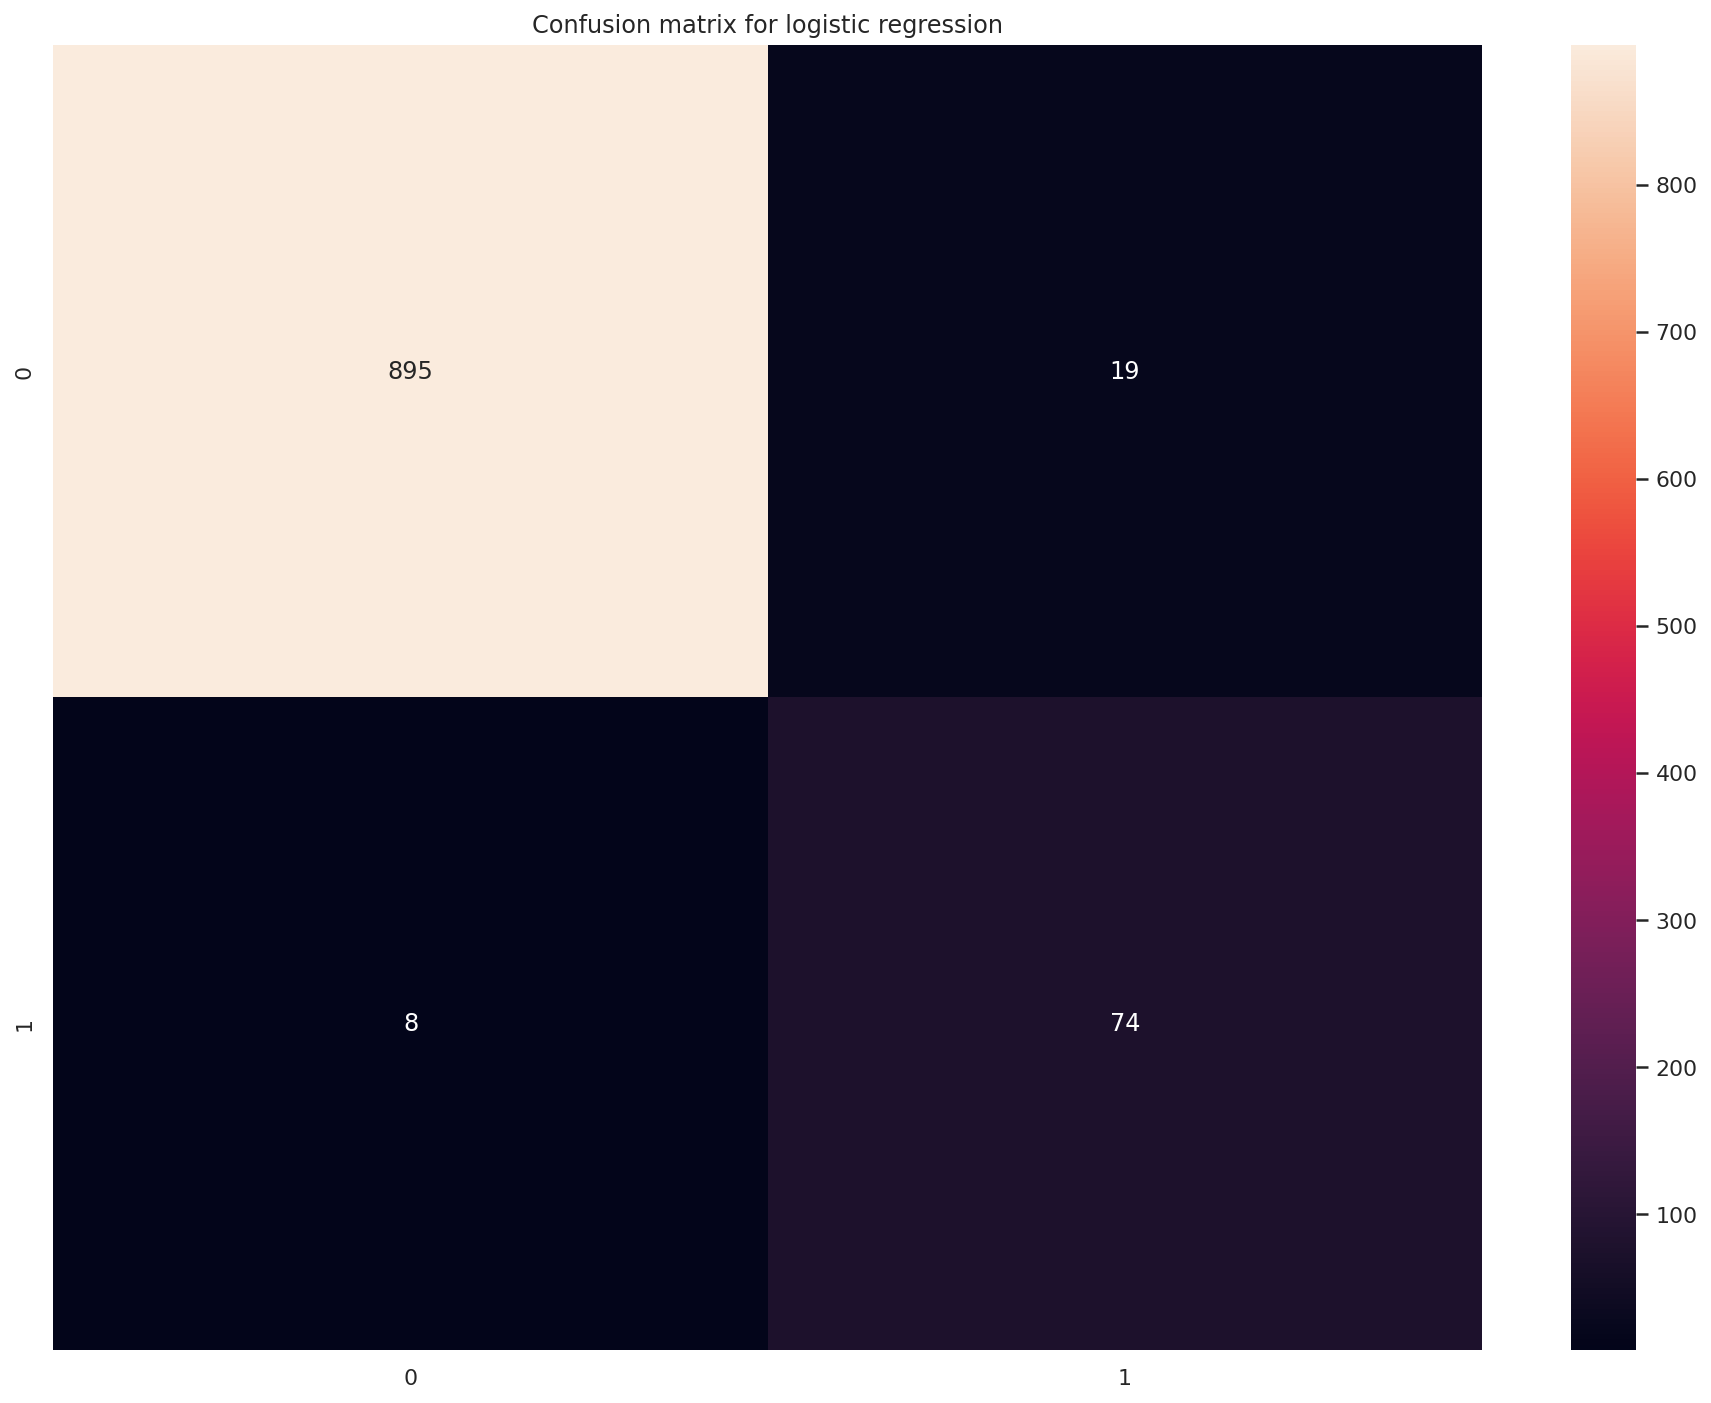

In [186]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for logistic regression')

In [154]:
# Predict using the model
prob_default= pipeline_lr.predict_proba(X_test)

In [155]:
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)

### Extended gradient boost algorithm

In [158]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('xgb', XGBClassifier())] #
# Create the pipeline: pipeline
pipeline_xgb= Pipeline(steps)
# Fit the pipeline to the train set
pipeline_xgb.fit(X_train_smote, y_train_smote)
# Predict the labels of the test set
y_pred_xgb= pipeline_xgb.predict(X_test)

/home/josephitopa/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:58:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [159]:
# Print the parameters of the model
print(pipeline_xgb.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))], 'verbose': False, 'scaler': StandardScaler(), 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              mi

In [160]:
# Compute metrics
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       914
           1       0.92      0.82      0.86        82

    accuracy                           0.98       996
   macro avg       0.95      0.91      0.93       996
weighted avg       0.98      0.98      0.98       996



Text(0.5, 1.0, 'Confusion matrix for xgradientboost')

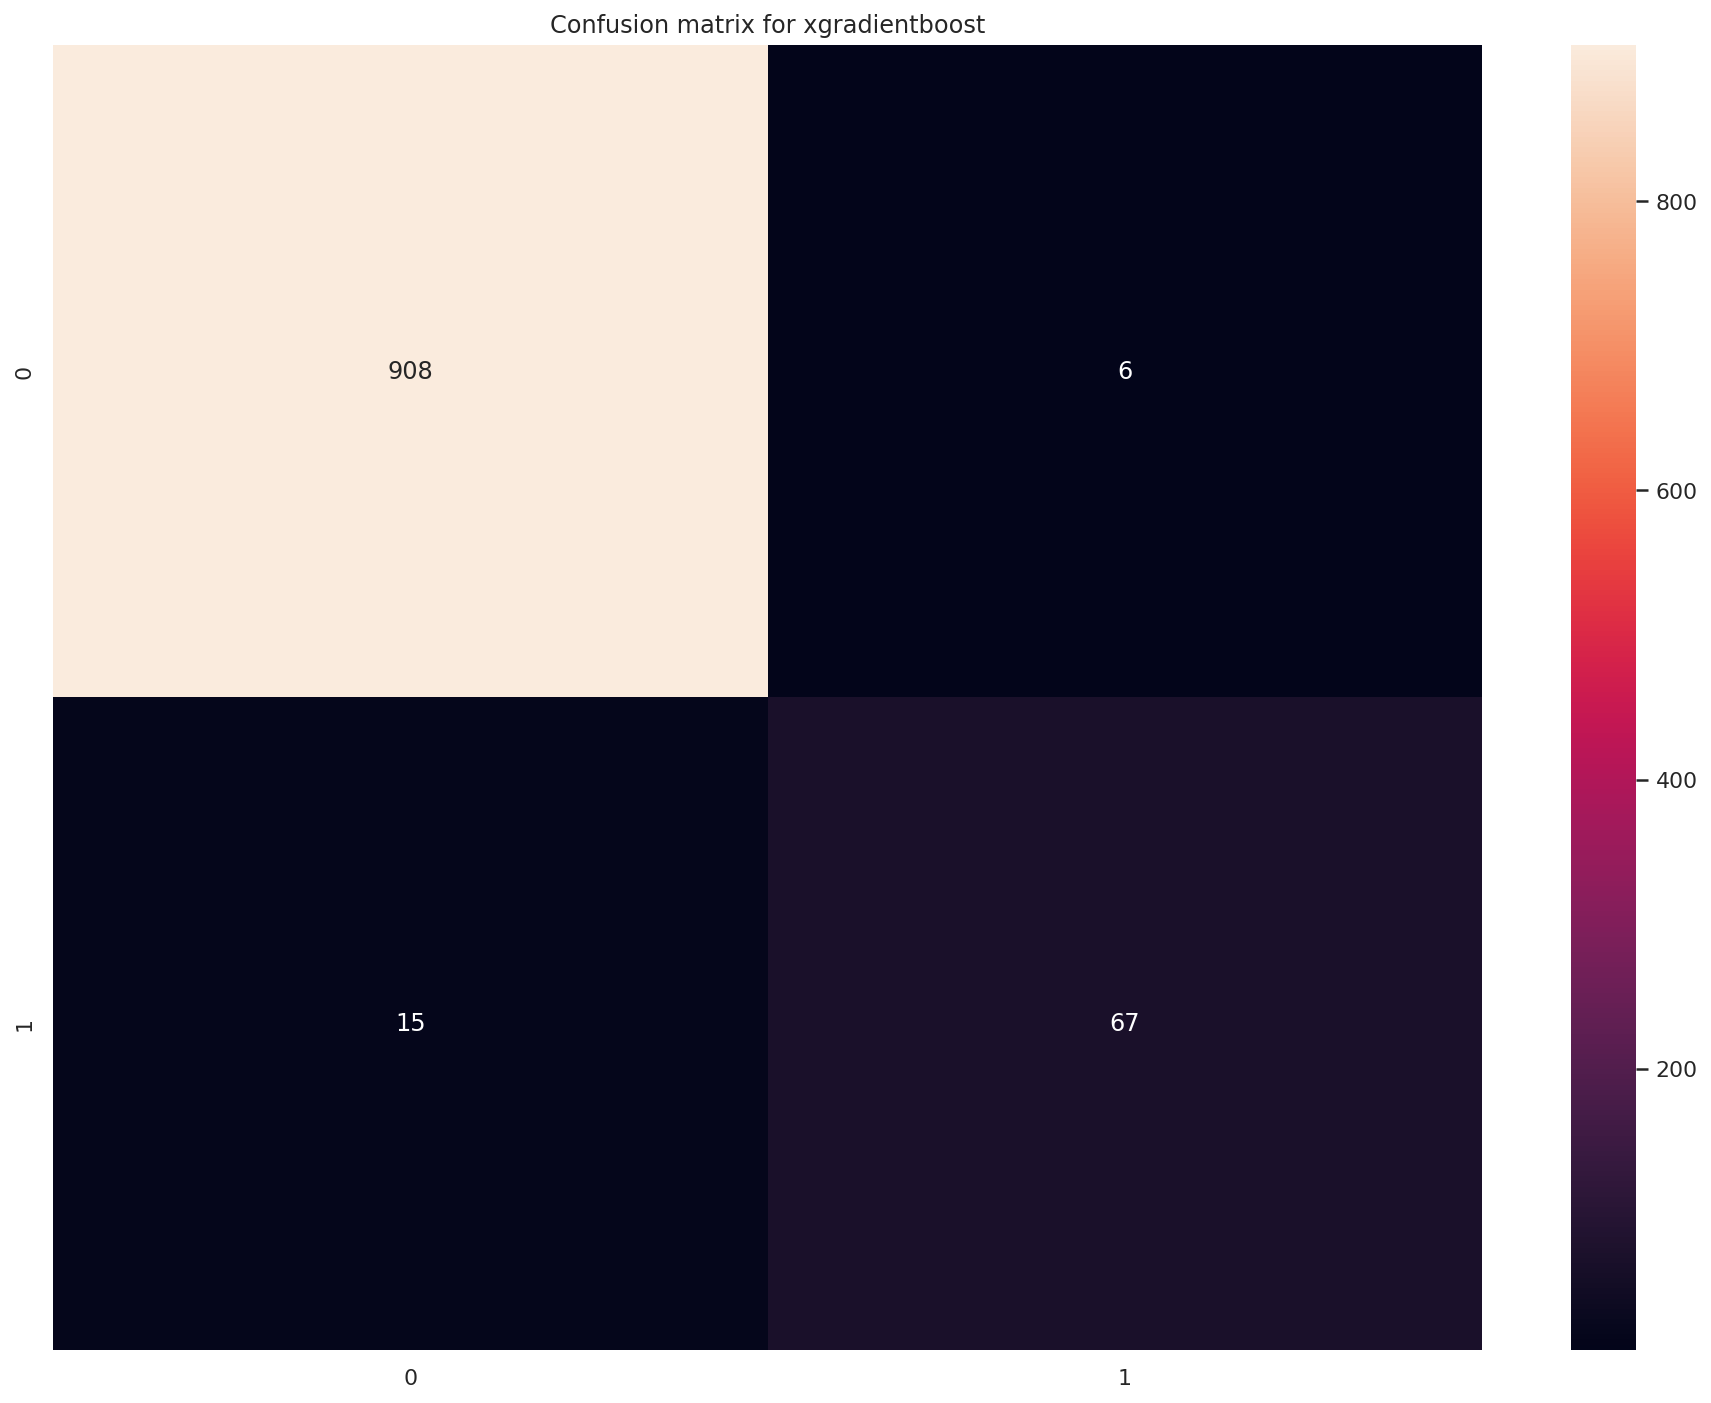

In [161]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for xgradientboost')

In [162]:
fallout_xgb, sensitivity_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)

### Random forest classifier

In [163]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestClassifier())] #
# Create the pipeline: pipeline
pipeline_rfr= Pipeline(steps)
# Fit the pipeline to the train set
pipeline_rfr.fit(X_train_smote, y_train_smote)
# Predict the labels of the test set
y_pred_rfr= pipeline_rfr.predict(X_test)

In [164]:
# Print the parameters of the model
print(pipeline_rfr.get_params())

{'memory': None, 'steps': [('scaler', StandardScaler()), ('rfr', RandomForestClassifier())], 'verbose': False, 'scaler': StandardScaler(), 'rfr': RandomForestClassifier(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'rfr__bootstrap': True, 'rfr__ccp_alpha': 0.0, 'rfr__class_weight': None, 'rfr__criterion': 'gini', 'rfr__max_depth': None, 'rfr__max_features': 'auto', 'rfr__max_leaf_nodes': None, 'rfr__max_samples': None, 'rfr__min_impurity_decrease': 0.0, 'rfr__min_impurity_split': None, 'rfr__min_samples_leaf': 1, 'rfr__min_samples_split': 2, 'rfr__min_weight_fraction_leaf': 0.0, 'rfr__n_estimators': 100, 'rfr__n_jobs': None, 'rfr__oob_score': False, 'rfr__random_state': None, 'rfr__verbose': 0, 'rfr__warm_start': False}


In [165]:
# Compute metrics
print(classification_report(y_test, y_pred_rfr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       914
           1       0.92      0.72      0.81        82

    accuracy                           0.97       996
   macro avg       0.95      0.86      0.90       996
weighted avg       0.97      0.97      0.97       996



Text(0.5, 1.0, 'Confusion matrix for random forest classifier')

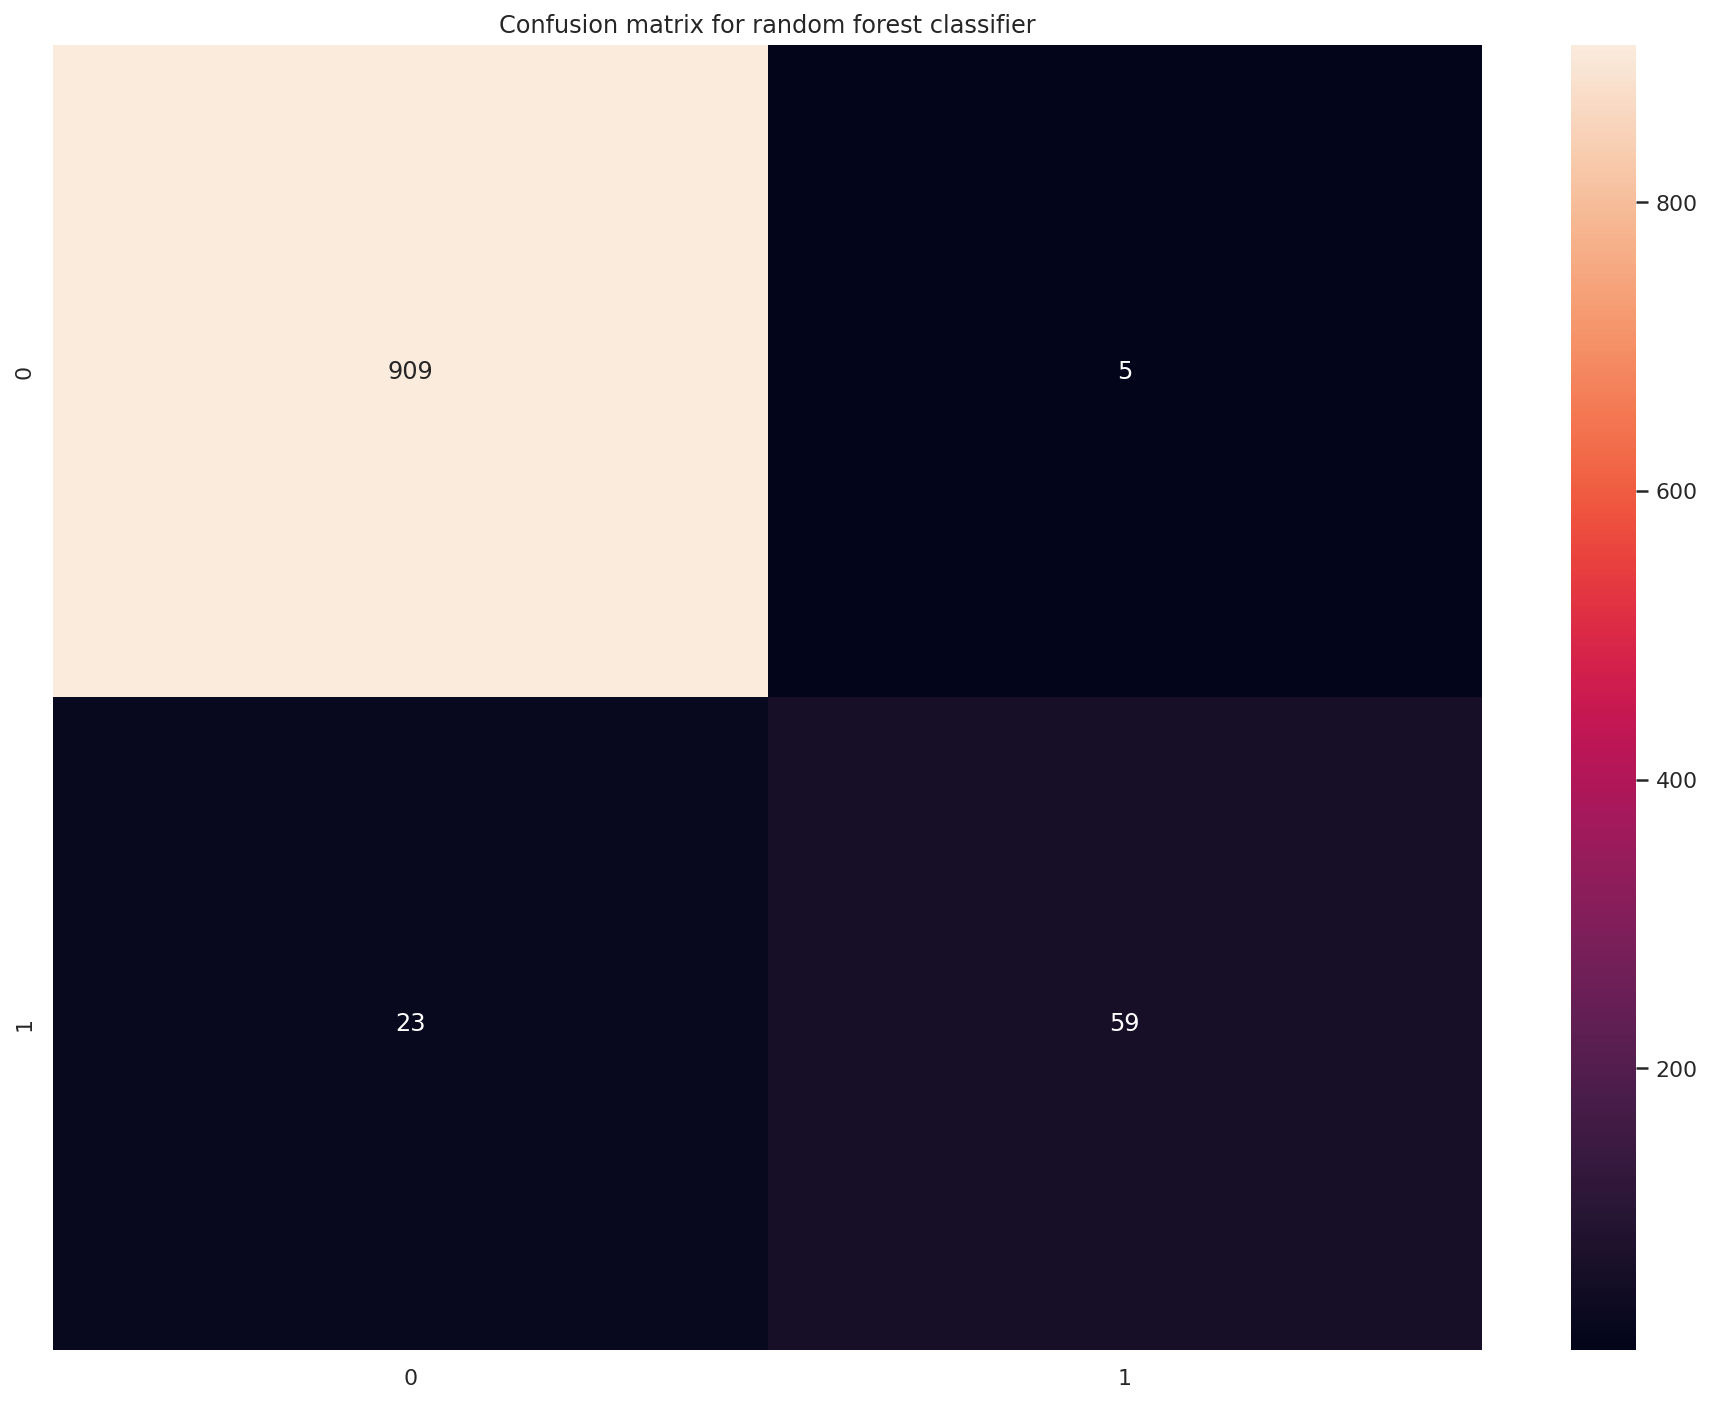

In [166]:
cm = confusion_matrix(y_test, y_pred_rfr)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for random forest classifier')

In [167]:
fallout_rfr, sensitivity_rfr, thresholds_rfr = roc_curve(y_test, y_pred_rfr)

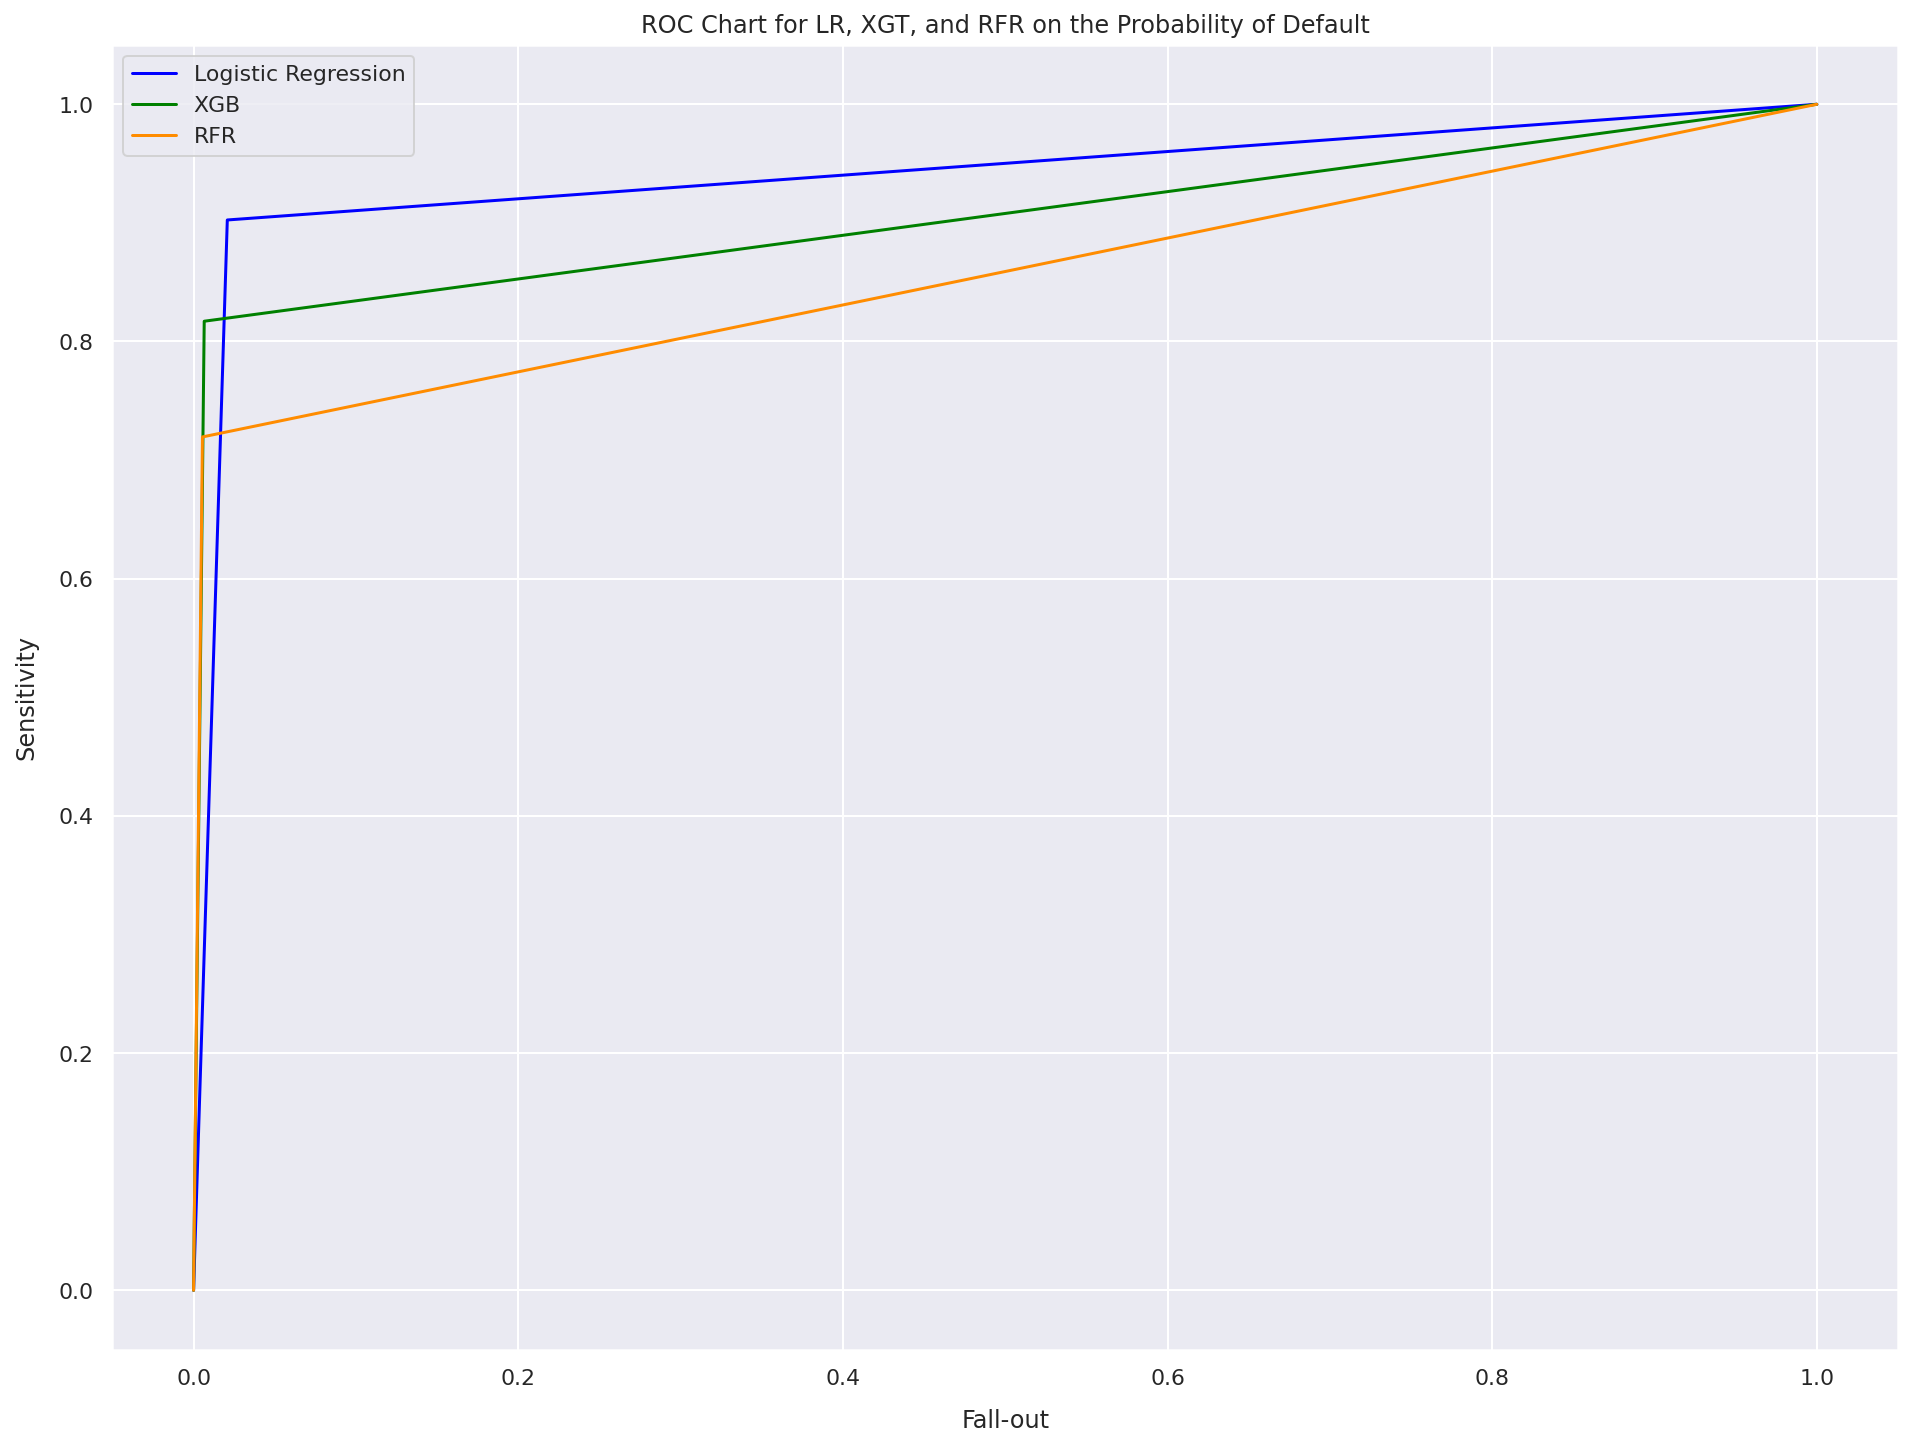

In [169]:
# ROC Chart
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_xgb, sensitivity_xgb, color = 'green', label='%s' % 'XGB')
plt.plot(fallout_rfr, sensitivity_rfr, color = 'darkorange', label='%s' % 'RFR')
plt.title("ROC Chart for LR, XGT, and RFR on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

### Model Validation

#### Logistic Regression

In [170]:
# Predict the labels of the validation set
y_pred_lr_val= pipeline_lr.predict(X_val)

In [171]:
# Compute metrics
print(classification_report(y_val, y_pred_lr_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       922
           1       0.84      0.84      0.84        74

    accuracy                           0.98       996
   macro avg       0.91      0.91      0.91       996
weighted avg       0.98      0.98      0.98       996



Text(0.5, 1.0, 'Confusion matrix for validated logistic regression')

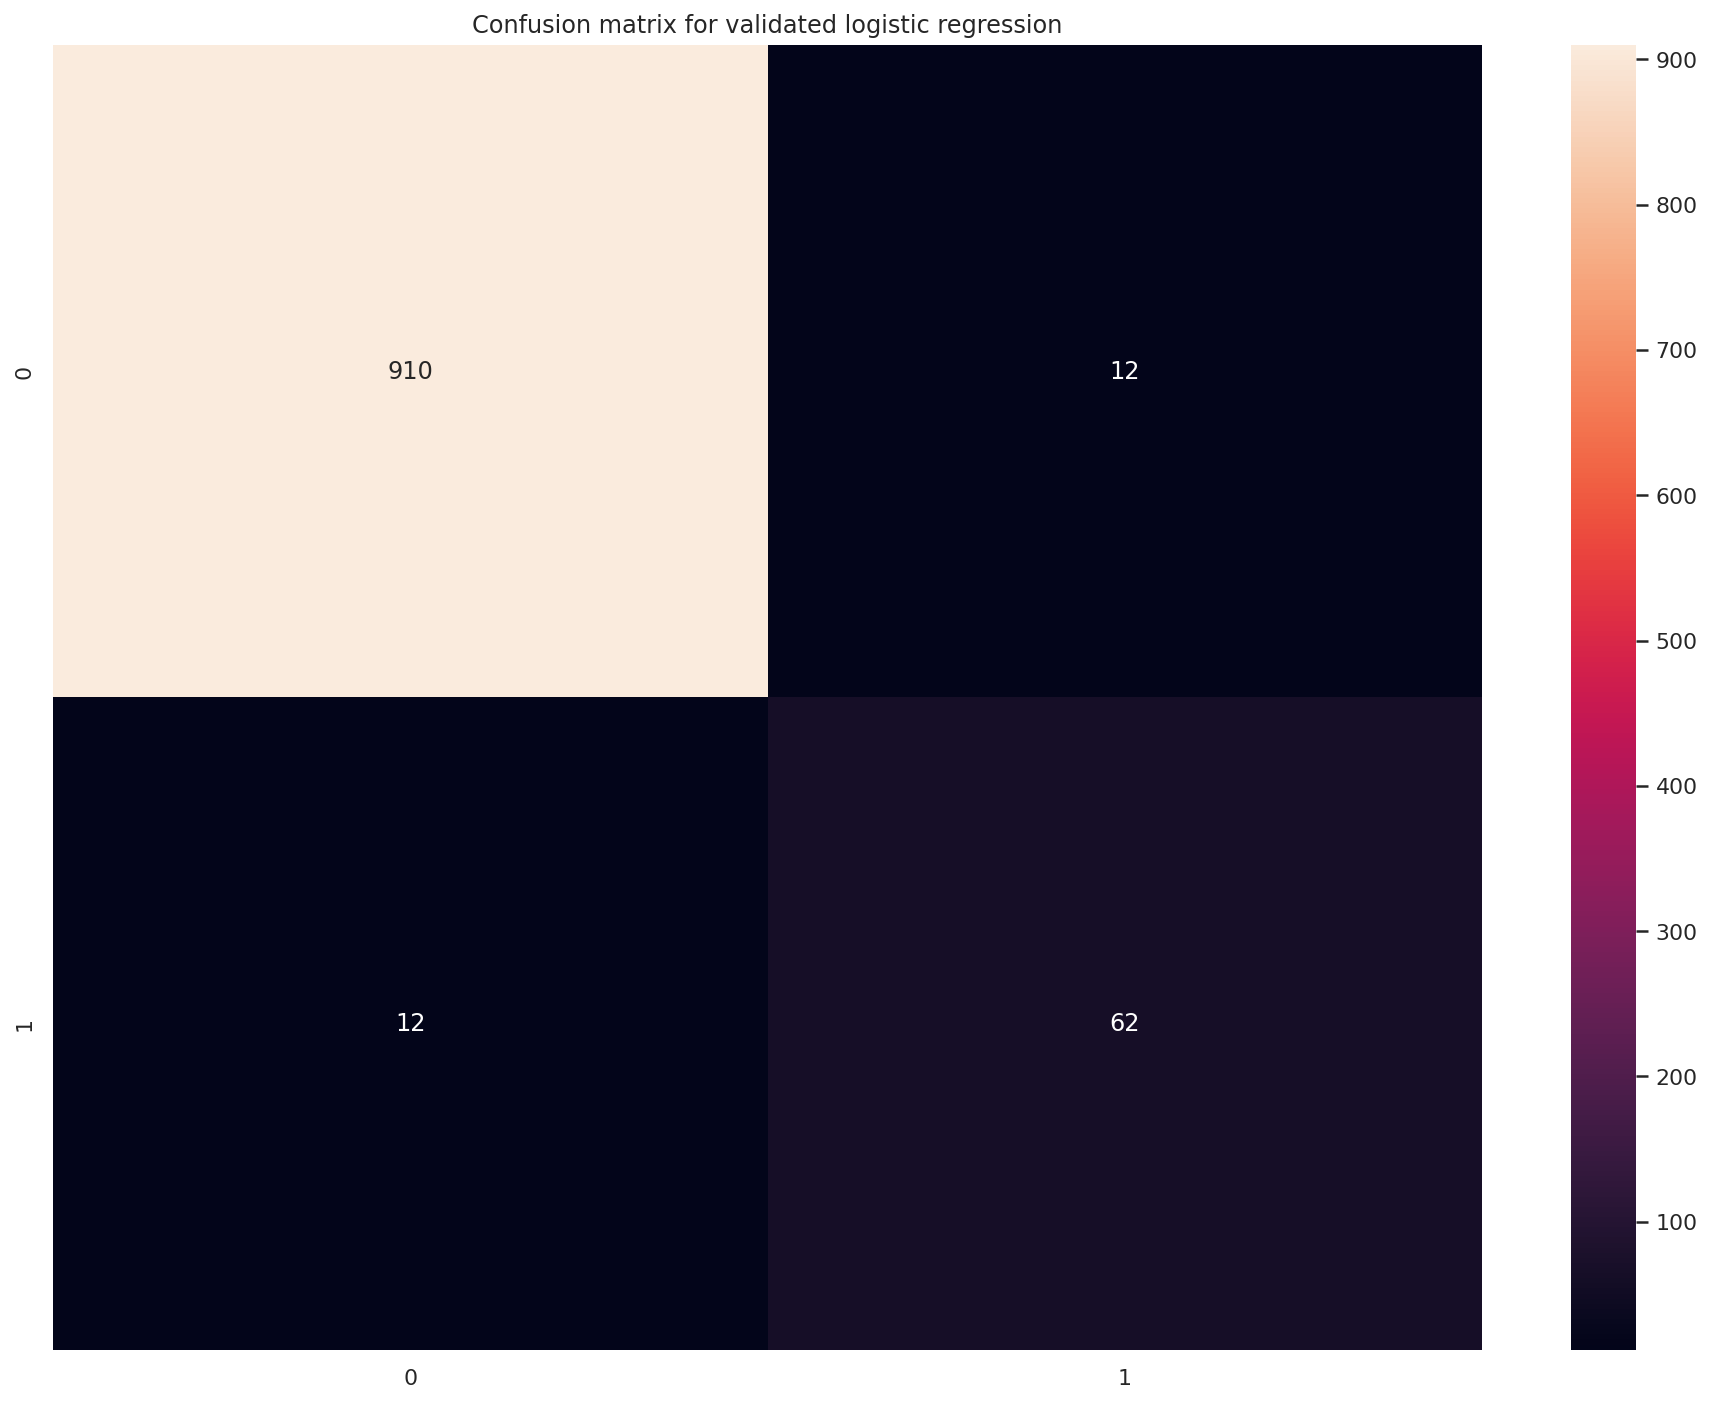

In [172]:
cm = confusion_matrix(y_val, y_pred_lr_val)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for validated logistic regression')

In [173]:
fallout_lr_val, sensitivity_lr_val, thresholds_lr_val = roc_curve(y_val, y_pred_lr_val)

#### xgradient boost

In [174]:
# Predict the labels of the validation set
y_pred_xgb_val= pipeline_xgb.predict(X_val)

In [175]:
# Compute metrics
print(classification_report(y_val, y_pred_xgb_val))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       922
           1       0.94      0.82      0.88        74

    accuracy                           0.98       996
   macro avg       0.96      0.91      0.93       996
weighted avg       0.98      0.98      0.98       996



Text(0.5, 1.0, 'Confusion matrix for validated XGradient Boost')

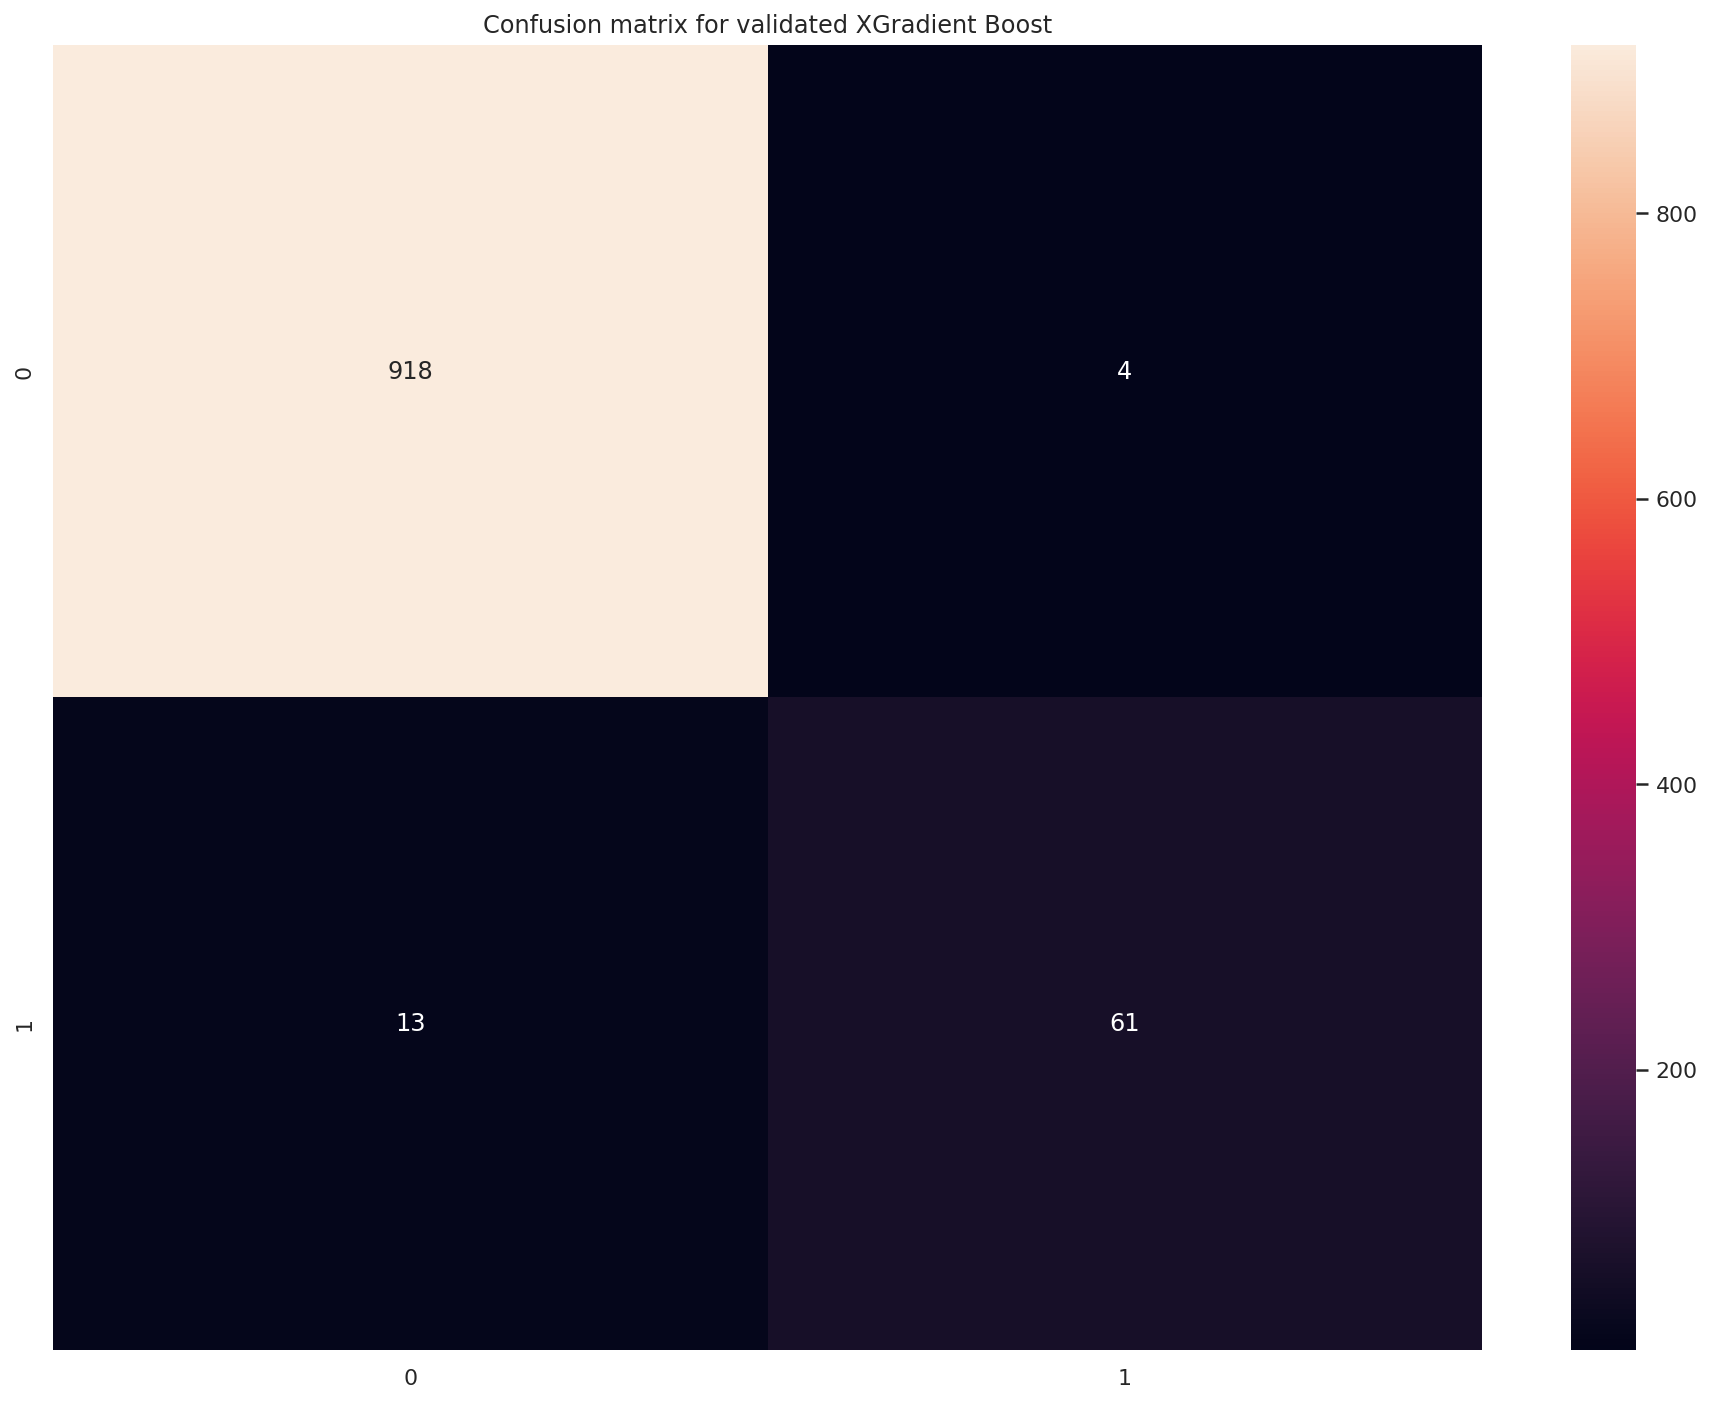

In [181]:
cm = confusion_matrix(y_val, y_pred_xgb_val)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for validated XGradient Boost')

In [176]:
fallout_xgb_val, sensitivity_xgb_val, thresholds_xgb_val = roc_curve(y_val, y_pred_xgb_val)

#### random forest regression

In [177]:
# Predict the labels of the validation set
y_pred_rfr_val= pipeline_rfr.predict(X_val)

In [178]:
# Compute metrics
print(classification_report(y_val, y_pred_rfr_val))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       922
           1       0.89      0.74      0.81        74

    accuracy                           0.97       996
   macro avg       0.93      0.87      0.90       996
weighted avg       0.97      0.97      0.97       996



Text(0.5, 1.0, 'Confusion matrix for validated Random forest Boost')

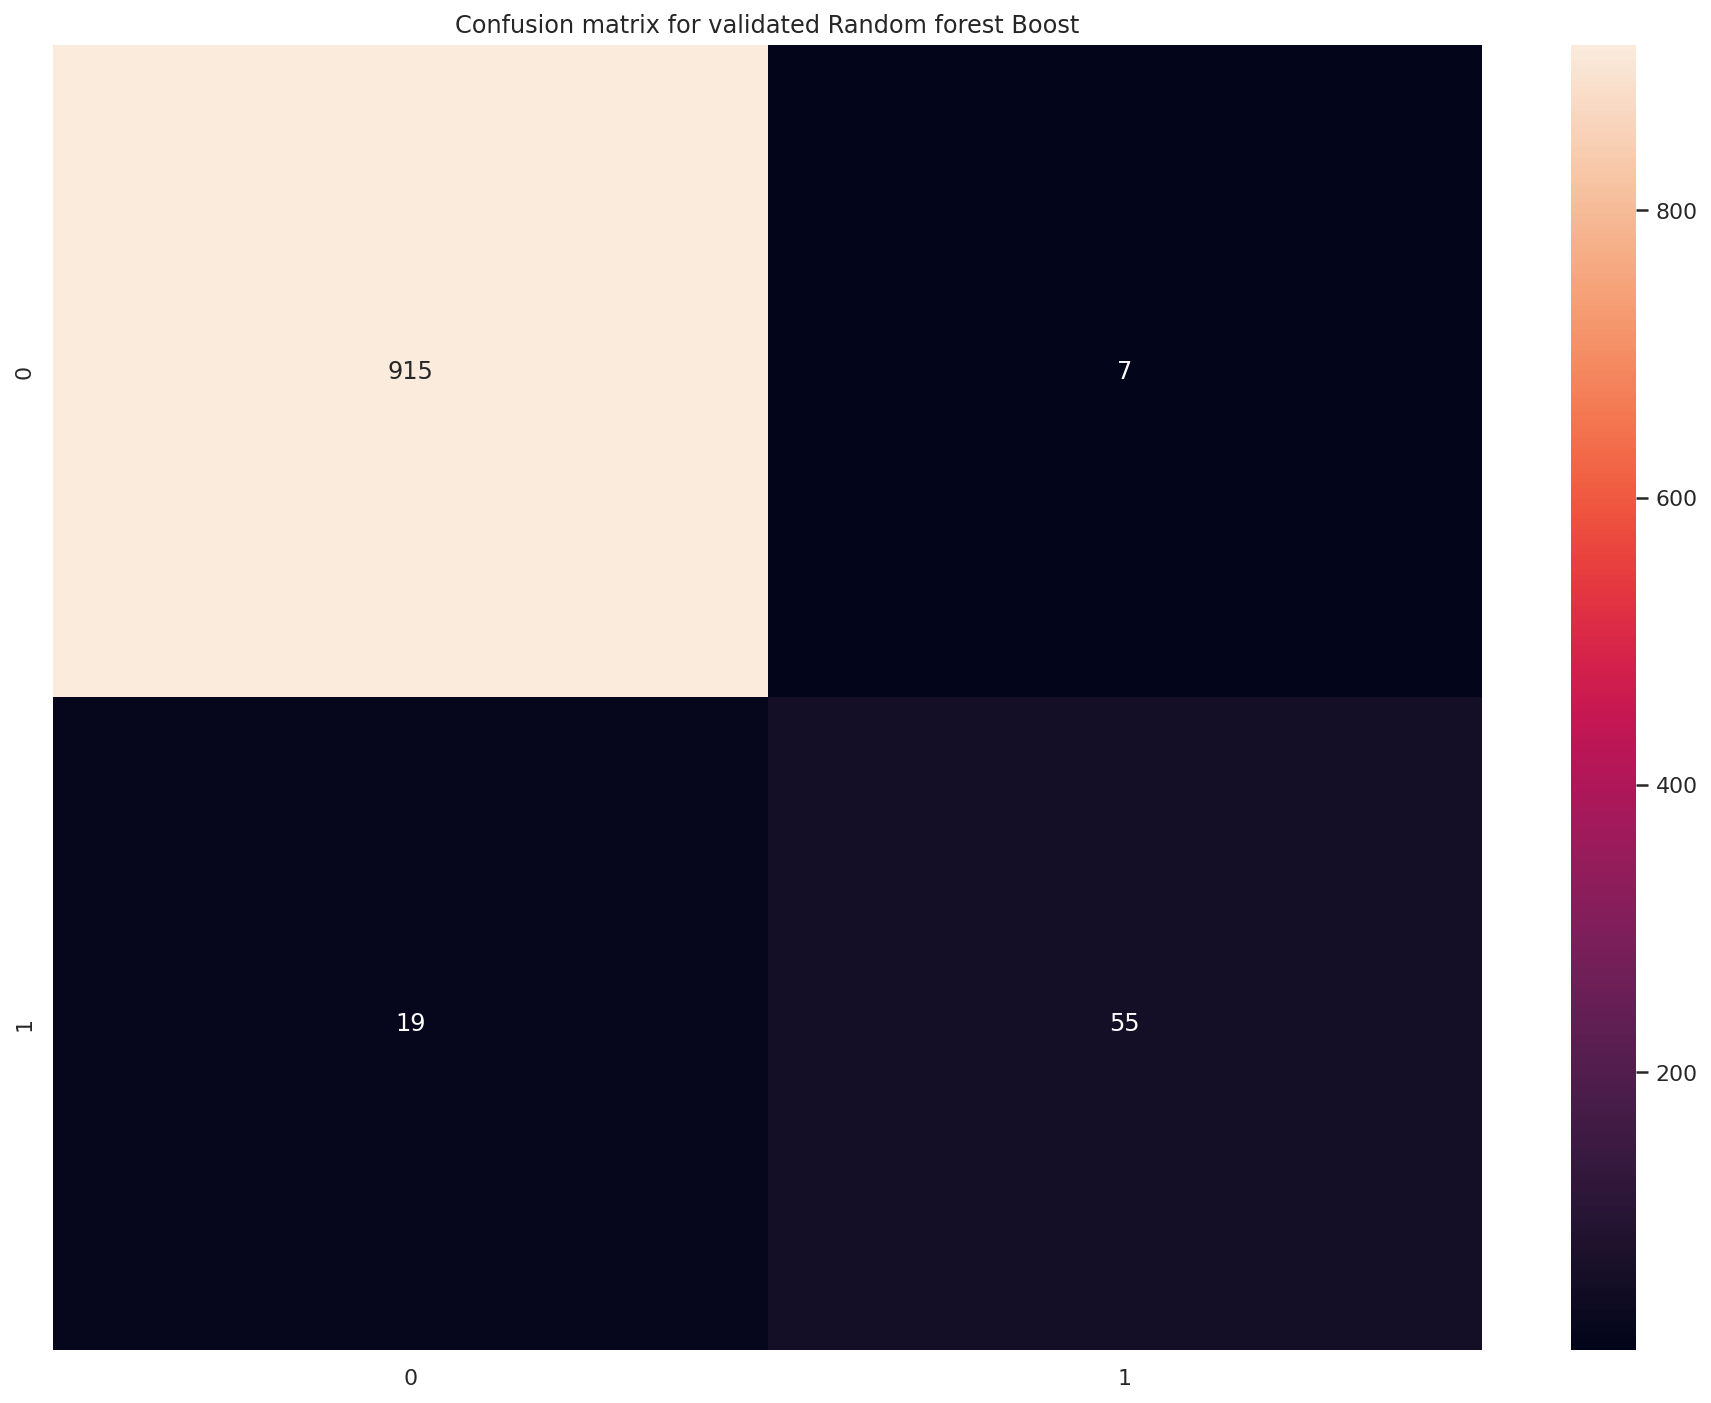

In [182]:
cm = confusion_matrix(y_val, y_pred_rfr_val)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix for validated Random forest Boost')

In [179]:
fallout_rfr_val, sensitivity_rfr_val, thresholds_rfr_val = roc_curve(y_val, y_pred_rfr_val)

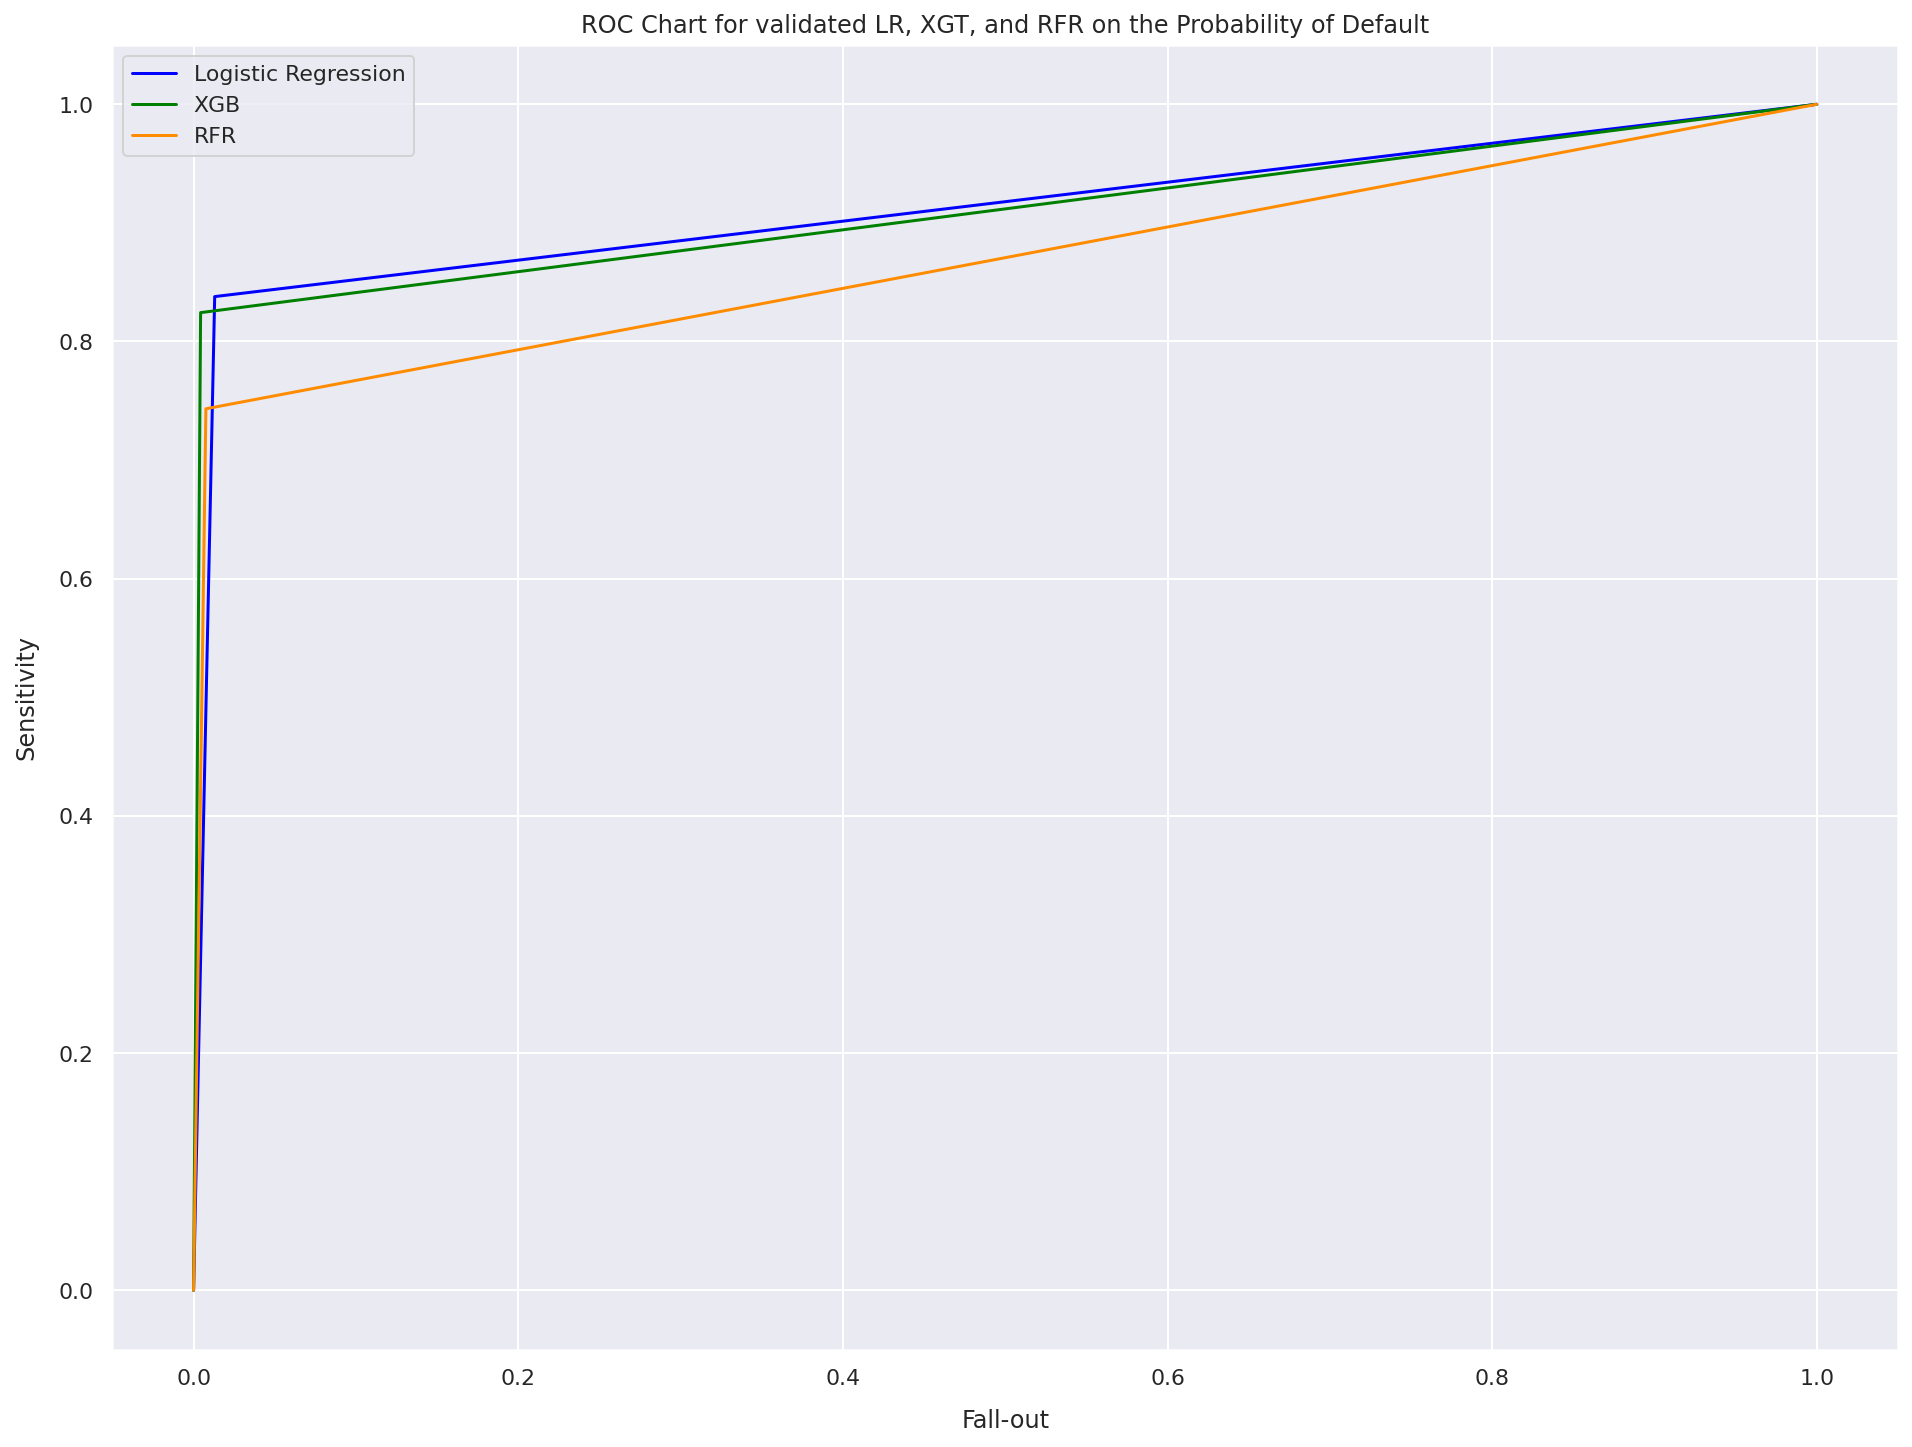

In [180]:
# ROC Chart
plt.plot(fallout_lr_val, sensitivity_lr_val, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_xgb_val, sensitivity_xgb_val, color = 'green', label='%s' % 'XGB')
plt.plot(fallout_rfr_val, sensitivity_rfr_val, color = 'darkorange', label='%s' % 'RFR')
plt.title("ROC Chart for validated LR, XGT, and RFR on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()